## Import Data

In [ ]:
import gdown
import pandas as pd
import numpy as np
import io

def load_from_drive(file_id, file_type, encoding='utf-8'):
    # Construct the download URL
    download_url = f'https://drive.google.com/uc?id={file_id}'

    # Set the output file name
    output = f'downloaded_file.{file_type}'

    # Download the file
    gdown.download(download_url, output, quiet=False)

    # Read the file based on its extension
    if file_type == 'csv' or file_type == 'gz':
        data = pd.read_csv(output, encoding=encoding)
    elif file_type == 'xlsx':
        data = pd.read_excel(output)
    else:
        raise ValueError("Unsupported file type. Please use 'csv', 'gz', or 'xlsx'.")

    return data


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
# # train dataset
file_id = '***'
file_type = 'gz'
train = load_from_drive(file_id, file_type)

Downloading...
From: https://drive.google.com/uc?id=1BwQEJeSmA9oZIaz0ws9tQn4_kHn-vlUL
To: /content/downloaded_file.gz
100%|██████████| 19.2M/19.2M [00:00<00:00, 118MB/s]


In [ ]:
# test dataset
file_id = '***'
file_type = 'gz'
test = load_from_drive(file_id, file_type)

Downloading...
From: https://drive.google.com/uc?id=1SEX1n4UVqV0yEg3Mbe47K-LZq5v7JjrB
To: /content/downloaded_file.gz
100%|██████████| 8.54M/8.54M [00:00<00:00, 85.9MB/s]


In [ ]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
1,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
2,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0
3,19,0,5,1,4,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,1.8,2.332649,10,0,-1,0,0,14,1,1,0,1,104,2,0.445982,0.879049,0.406202,3.000000,0.7,0.8,0.4,3,1,8,2,11,3,8,4,2,0,9,0,1,0,1,1,1
4,26,0,5,1,3,1,0,0,0,1,0,0,0,0,0,0,6,1,0,0,0.9,0.7,0.901388,10,1,-1,0,1,14,1,1,0,1,68,3,0.400000,0.780641,0.407431,2.828427,0.9,0.8,0.6,3,1,7,3,9,4,11,4,2,1,5,0,1,0,0,0,1


In [ ]:
test.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,642026,0,4,1,5,1,0,1,0,0,0,0,0,0,0,0,8,0,1,0,0.7,1.4,1.368393,10,1,-1,0,1,11,1,1,0,1,16,3,0.421782,0.596720,0.373497,1.414214,0.0,0.3,0.2,5,0,8,3,9,3,7,7,3,2,3,0,1,0,1,0,0
1,297043,0,6,2,10,1,0,0,0,0,1,0,0,0,0,0,5,1,0,0,0.9,1.4,1.798437,10,0,-1,0,1,5,1,1,0,1,104,1,0.424264,1.237825,0.446094,3.162278,0.3,0.8,0.3,1,1,8,4,8,4,9,6,3,3,5,0,1,1,0,0,0
2,140591,0,4,1,9,1,0,0,0,1,0,0,0,0,0,0,10,0,0,0,0.1,0.1,-1.000000,11,1,0,0,1,1,1,1,1,1,31,3,0.400000,0.546628,-1.000000,1.000000,0.2,0.6,0.3,5,1,8,2,8,2,12,3,1,0,7,0,0,1,0,0,0
3,1354540,0,0,1,7,1,4,0,1,0,0,0,0,0,0,0,3,0,0,1,0.9,1.3,0.868907,11,1,1,0,1,15,1,0,2,1,97,3,0.360555,0.874147,0.298329,3.605551,0.4,0.8,0.1,3,2,7,4,10,2,5,1,1,3,6,1,1,0,0,0,0
4,873173,0,1,1,3,1,0,1,0,0,0,0,0,0,0,0,12,0,1,0,0.6,0.4,0.741620,11,1,-1,0,-1,1,1,1,2,1,38,3,0.316228,0.740165,0.359861,3.464102,0.0,0.8,0.9,3,2,10,3,11,3,10,6,1,5,6,0,1,0,0,0,0


## Data Overview

In [ ]:
import pandas as pd

def data_overview(df, name="DataFrame"):
    """
    Data Overview Function:
    - Displays number of rows and columns
    - Prints DataFrame info
    - Shows missing value counts
    - Shows duplicate row count
    - Shows count of unique values per column
    - Shows descriptive statistics for numerical features

    Parameters:
    - df (DataFrame): The dataset to inspect
    - name (str): Name of the dataset (default is "DataFrame")

    Returns:
    - None (prints information directly)
    """
    print(f"\nDataFrame: {name}\n")

    # DataFrame Shape
    print(f"{df.shape[0]} rows, {df.shape[1]} columns\n")

    # DataFrame Info
    print("DataFrame Info:")
    print(df.info())

    # Missing Value Count
    missing_values = df.isna().sum()
    print("\nMissing Values:")
    print(missing_values[missing_values > 0])

    # Duplicate Row Count
    duplicate_count = df.duplicated().sum()
    print(f"\nDuplicate Rows: {duplicate_count}")

    # Unique Value Count
    unique_counts = df.nunique()
    print("\nUnique Values per Column:")
    print(unique_counts)

    # Descriptive Statistics
    print("\nDescriptive Statistics:")
    print(df.describe())

In [ ]:
data_overview(train, 'train')
data_overview(test, 'test')


DataFrame: train

416648 rows, 59 columns

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416648 entries, 0 to 416647
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              416648 non-null  int64  
 1   target          416648 non-null  int64  
 2   ps_ind_01       416648 non-null  int64  
 3   ps_ind_02_cat   416648 non-null  int64  
 4   ps_ind_03       416648 non-null  int64  
 5   ps_ind_04_cat   416648 non-null  int64  
 6   ps_ind_05_cat   416648 non-null  int64  
 7   ps_ind_06_bin   416648 non-null  int64  
 8   ps_ind_07_bin   416648 non-null  int64  
 9   ps_ind_08_bin   416648 non-null  int64  
 10  ps_ind_09_bin   416648 non-null  int64  
 11  ps_ind_10_bin   416648 non-null  int64  
 12  ps_ind_11_bin   416648 non-null  int64  
 13  ps_ind_12_bin   416648 non-null  int64  
 14  ps_ind_13_bin   416648 non-null  int64  
 15  ps_ind_14       416648 non-null  int64  
 

In [ ]:
# define target，categorical，numerical variable
target = ['target']
cat = [col for col in train.columns if ('cat' in col) or ('bin' in col) and (col != 'id')]
num = [col for col in train.columns if (col not in cat) and (col not in target) and (col != 'id')]

In [ ]:
# If the minimum value is -1, it indicates missing values in those columns
print(train.describe().T[train.describe().T['min']==-1])
print('\n')
print(test.describe().T[test.describe().T['min']==-1])

                  count      mean       std  min       25%       50%  \
ps_ind_02_cat  416648.0  1.358782  0.664078 -1.0  1.000000  1.000000   
ps_ind_04_cat  416648.0  0.416697  0.493280 -1.0  0.000000  0.000000   
ps_ind_05_cat  416648.0  0.405179  1.350877 -1.0  0.000000  0.000000   
ps_reg_03      416648.0  0.552344  0.792924 -1.0  0.525595  0.721110   
ps_car_01_cat  416648.0  8.296348  2.507419 -1.0  7.000000  7.000000   
ps_car_02_cat  416648.0  0.830408  0.375287 -1.0  1.000000  1.000000   
ps_car_03_cat  416648.0 -0.505218  0.788539 -1.0 -1.000000 -1.000000   
ps_car_05_cat  416648.0 -0.158225  0.844584 -1.0 -1.000000  0.000000   
ps_car_07_cat  416648.0  0.910356  0.346549 -1.0  1.000000  1.000000   
ps_car_09_cat  416648.0  1.329621  0.978713 -1.0  0.000000  2.000000   
ps_car_11      416648.0  2.346144  0.832107 -1.0  2.000000  3.000000   
ps_car_12      416648.0  0.379919  0.058342 -1.0  0.316228  0.374166   
ps_car_14      416648.0  0.276577  0.356691 -1.0  0.333916  0.36

## Data Clean

### Handling Missing Value

In [ ]:
import pandas as pd

def get_missing_summary(df, missing_value=-1):

    # Count missing values
    missing_cnts = (df == missing_value).sum()

    # Calculate missing value percentage
    missing_pct = missing_cnts / len(df) * 100

    # Create summary DataFrame
    missing_summary = pd.DataFrame({
        'missing_cnts': missing_cnts,
        'missing_pct%': missing_pct
    })

    # Keep only columns with missing values
    missing_summary = missing_summary[missing_summary['missing_cnts'] > 0]

    # Sort by count of missing values in descending order
    missing_summary = missing_summary.sort_values(by='missing_cnts', ascending=False)

    return missing_summary

In [ ]:
missing_summary_train = get_missing_summary(train)
missing_summary_train

,missing_cnts,missing_pct%
ps_car_03_cat,287957,69.112776
ps_car_05_cat,186779,44.828968
ps_reg_03,75228,18.055529
ps_car_14,29746,7.139360
ps_car_07_cat,8018,1.924406
ps_ind_05_cat,4057,0.973724
ps_car_09_cat,393,0.094324
ps_ind_02_cat,139,0.033361
ps_car_01_cat,69,0.016561
ps_ind_04_cat,55,0.013201


In [ ]:
missing_summary_test = get_missing_summary(test)
missing_summary_test

,missing_cnts,missing_pct%
ps_car_03_cat,123274,69.036312
ps_car_05_cat,79772,44.674178
ps_reg_03,32544,18.225398
ps_car_14,12874,7.209740
ps_car_07_cat,3471,1.943841
ps_ind_05_cat,1752,0.981161
ps_car_09_cat,176,0.098564
ps_ind_02_cat,77,0.043122
ps_car_01_cat,38,0.021281
ps_ind_04_cat,28,0.015681


In [ ]:
missing_train_cols = missing_summary_train.index.tolist()
missing_train_cols

['ps_car_03_cat',
 'ps_car_05_cat',
 'ps_reg_03',
 'ps_car_14',
 'ps_car_07_cat',
 'ps_ind_05_cat',
 'ps_car_09_cat',
 'ps_ind_02_cat',
 'ps_car_01_cat',
 'ps_ind_04_cat',
 'ps_car_02_cat',
 'ps_car_11',
 'ps_car_12']

In [ ]:
missing_test_cols = missing_summary_test.index.tolist()
missing_test_cols

['ps_car_03_cat',
 'ps_car_05_cat',
 'ps_reg_03',
 'ps_car_14',
 'ps_car_07_cat',
 'ps_ind_05_cat',
 'ps_car_09_cat',
 'ps_ind_02_cat',
 'ps_car_01_cat',
 'ps_ind_04_cat',
 'ps_car_02_cat',
 'ps_car_11']

-  The top two columns have over 35% missing values, so we'll drop them first.


In [ ]:
cols_to_drop=['ps_car_03_cat','ps_car_05_cat']

In [ ]:
cat = [col for col in cat if col not in cols_to_drop]

In [ ]:
# make a copy
train_copy = train.copy()
test_copy = test.copy()

In [ ]:
train_copy.drop(cols_to_drop,axis=1,inplace=True)
test_copy.drop(cols_to_drop,axis=1,inplace=True)

For numerical variables:
- **'ps_reg_03' and 'ps_car_14'** have relatively high amounts of missing data,
- **'ps_car_11', 'ps_car_12'** has very few missing values.

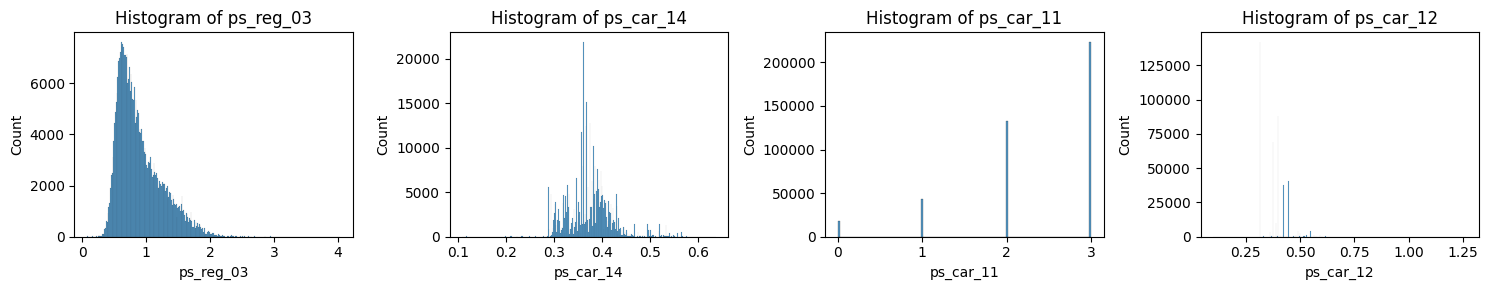

In [ ]:
import seaborn as sns
import math
import matplotlib.pyplot as plt
import numpy as np

# Set number of columns and rows for subplots
num_cols = 4
num_rows = 1
plt.figure(figsize=(15, 3))

# Plot histograms for selected continuous features
for i, column in enumerate(['ps_reg_03', 'ps_car_14', 'ps_car_11', 'ps_car_12']):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(x=column, data=train_copy.replace(-1, np.nan))
    plt.title(f'Histogram of {column}')

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()


Since data is skewed, use medium to impute **'ps_reg_03', 'ps_car_14', 'ps_car_11', 'ps_car_12'**

In [ ]:
from sklearn.impute import SimpleImputer

# Columns with missing numerical values to be imputed
missing_num_cols = ['ps_reg_03', 'ps_car_14', 'ps_car_11', 'ps_car_12']

# Fit the imputer on the training data using the median strategy, and fill in the training set
median_imputer = SimpleImputer(missing_values=-1, strategy='median')
train_copy[missing_num_cols] = median_imputer.fit_transform(train_copy[missing_num_cols])

# Use the same medians (from training data) to impute missing values in the test set
test_copy[missing_num_cols] = median_imputer.transform(test_copy[missing_num_cols])


For categorical variable

In [ ]:
missing_cat_cols = ['ps_car_07_cat','ps_ind_05_cat','ps_car_09_cat','ps_ind_02_cat','ps_car_01_cat','ps_ind_04_cat','ps_car_02_cat']

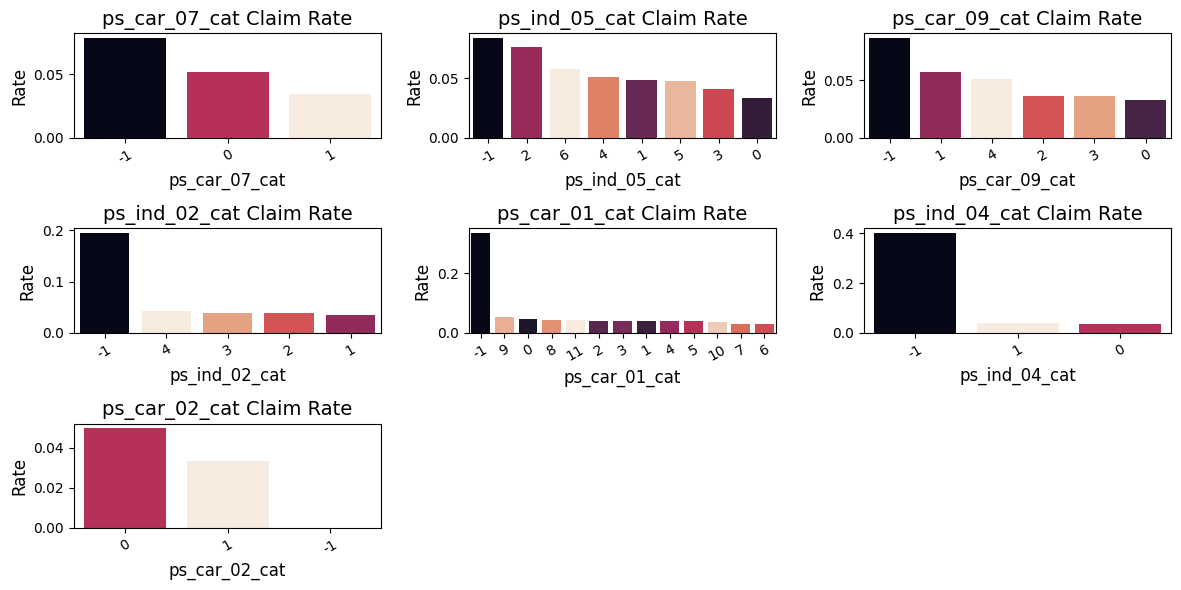

In [ ]:
# Set figure size and layout
num_cols = 3
num_rows = math.ceil(len(missing_cat_cols) / num_cols)
plt.figure(figsize=(12, 6))

# Plot bar charts showing claim rate by category for each missing categorical column
for i, col in enumerate(missing_cat_cols):
    plt.subplot(num_rows, num_cols, i + 1)

    # Calculate claim rate per category
    cat_perc = train_copy[[col, 'target']].groupby(col, as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)

    # Draw barplot sorted by claim rate
    sns.barplot(
        x=col, y='target', data=cat_perc,
        order=cat_perc[col], hue=col,
        palette='rocket', legend=False
    )
    plt.title(f'{col} Claim Rate', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Rate', fontsize=12)
    plt.xticks(rotation=30)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Since the -1 category shows a relatively high claim rate in **['ps_car_07_cat','ps_ind_05_cat', 'ps_car_09_cat', 'ps_ind_02_cat', 'ps_car_01_cat', 'ps_ind_04_cat']**,  we’ll keep -1 as a separate category rather than treating it as missing.

For the column **'ps_car_02_cat'**, we'll impute using the mode.

In [ ]:
# Fill missing values in the test set using mode
from sklearn.impute import SimpleImputer

mode_imputer = SimpleImputer(missing_values=-1, strategy='most_frequent')
train_copy['ps_car_02_cat'] = mode_imputer.fit_transform(train_copy[['ps_car_02_cat']])

### Outlier Detection & Handling

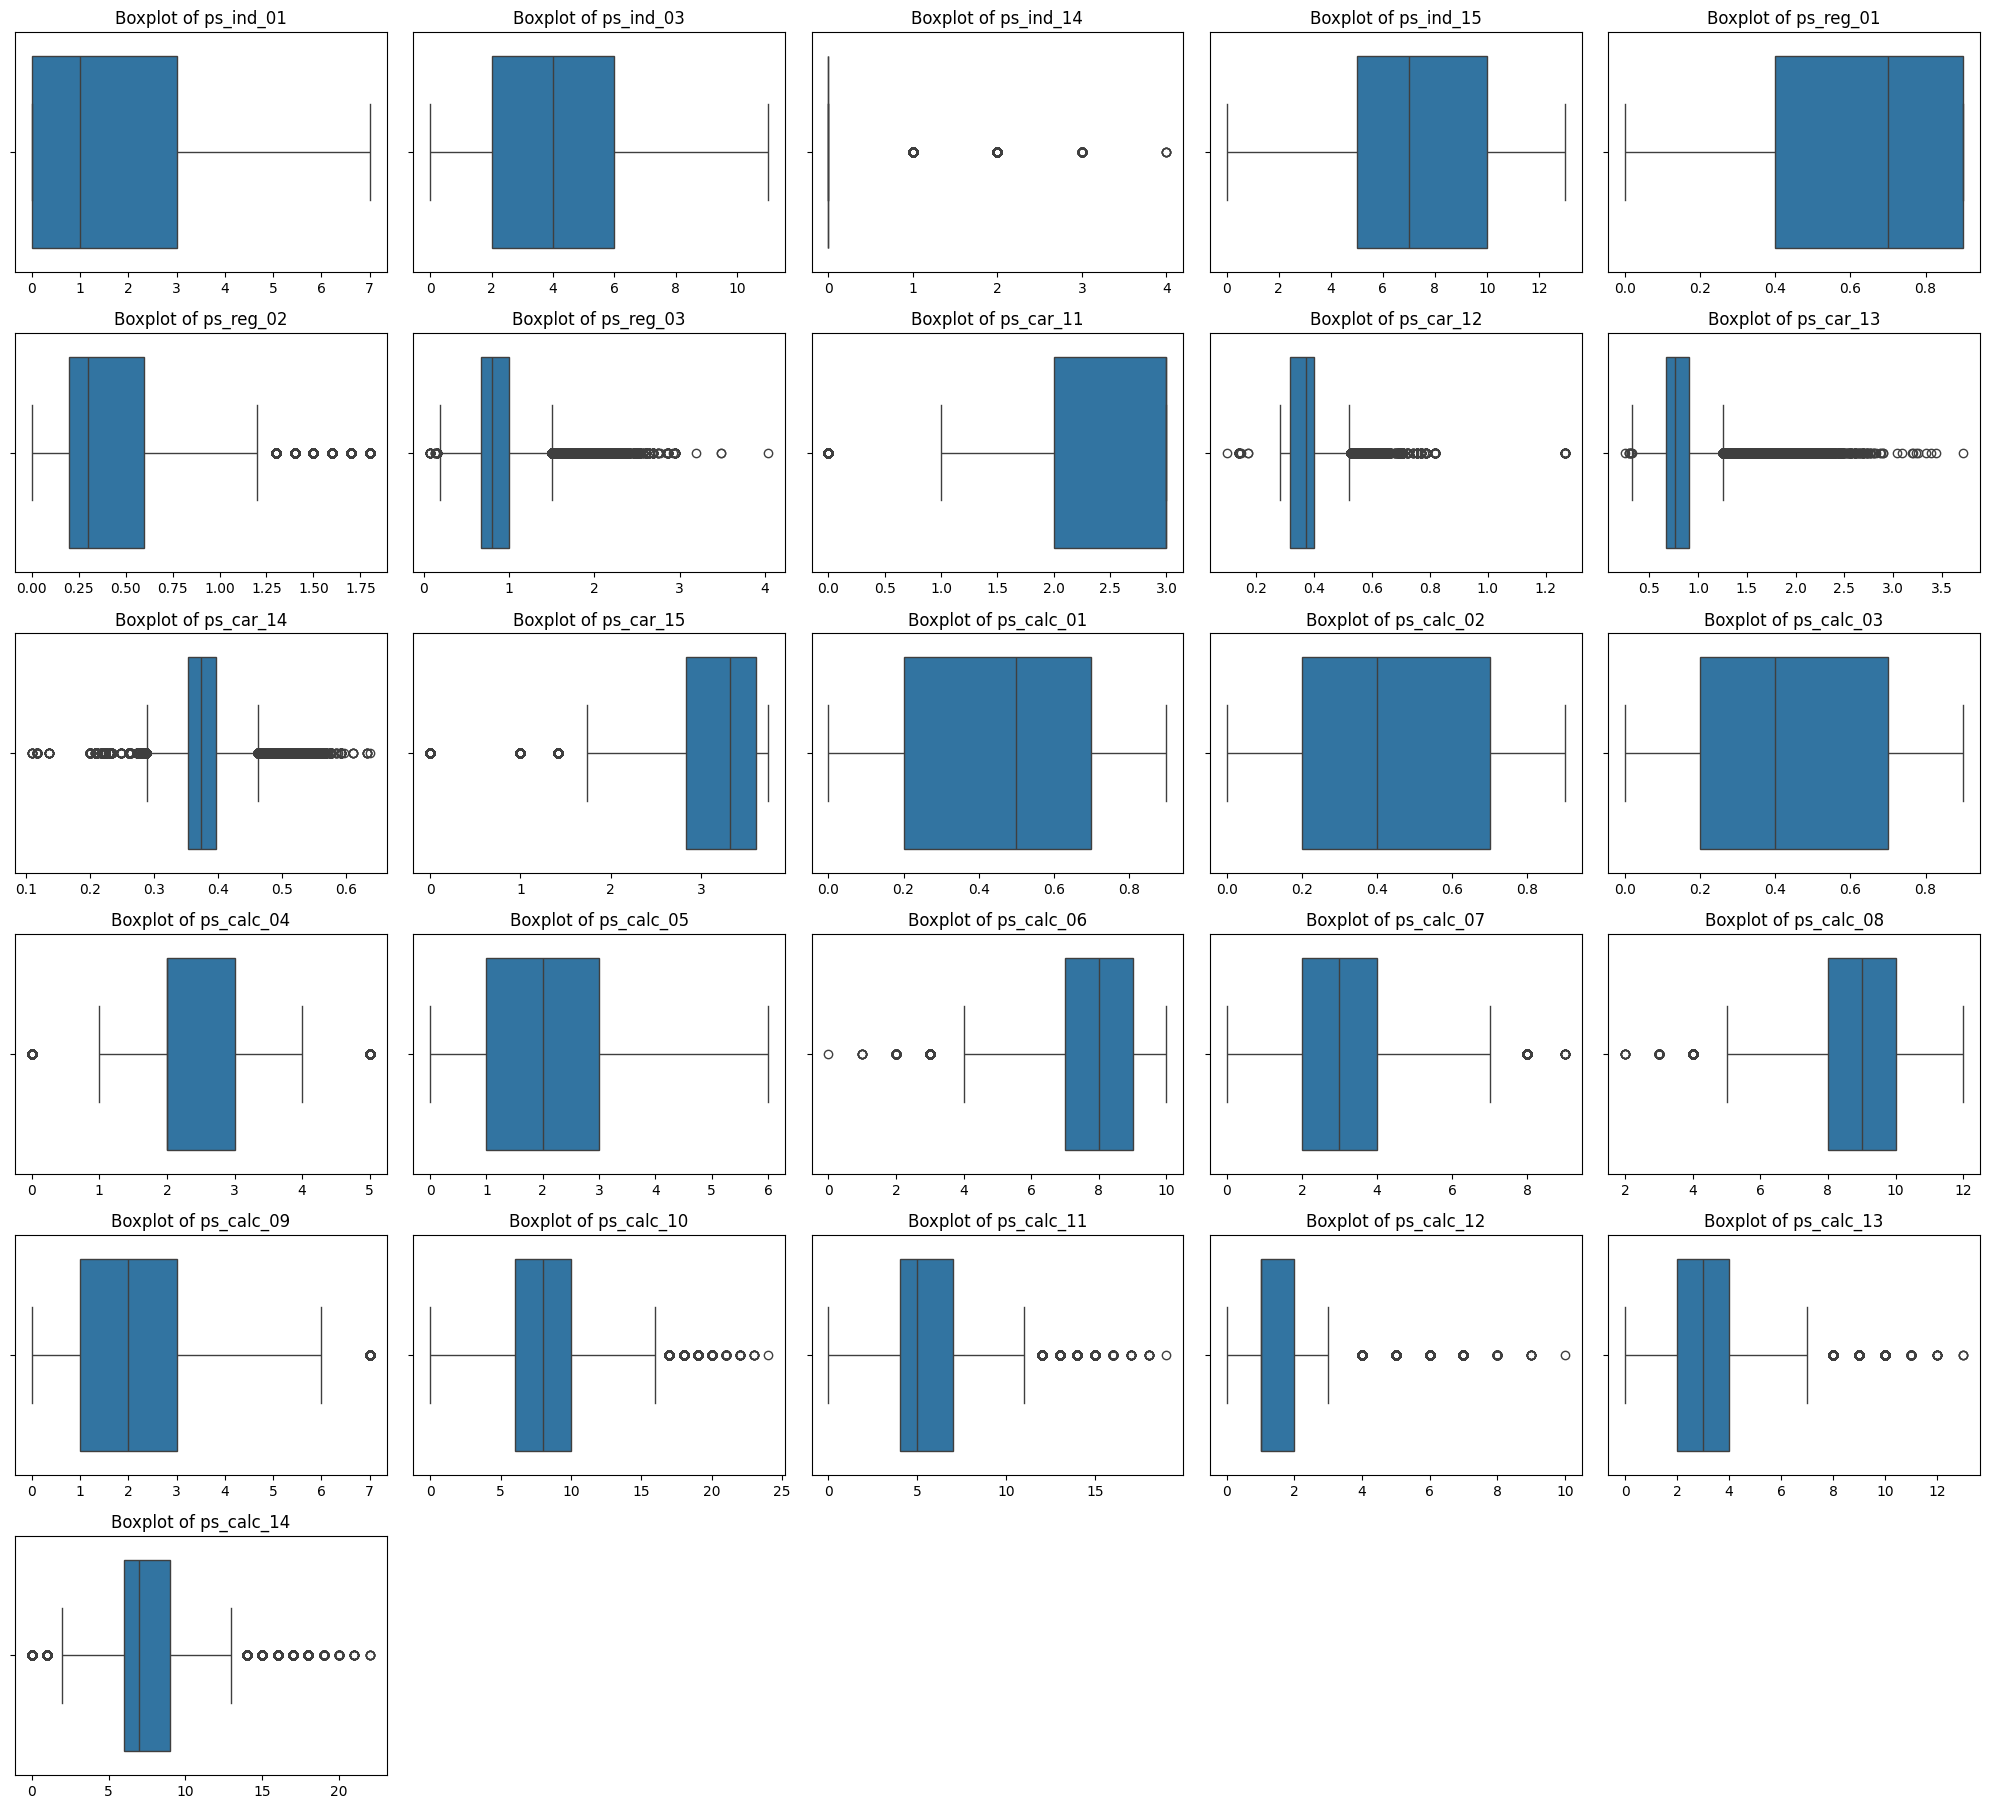

In [ ]:
import seaborn as sns
import math
import matplotlib.pyplot as plt

# Set number of columns and rows for the subplot layout
num_cols = 5
num_rows = math.ceil(len(train_copy.columns) / num_cols)
fig_width = num_cols * 4
fig_height = num_rows * 3
plt.figure(figsize=(fig_width, fig_height))

# Plot boxplots for all numerical columns
for i, column in enumerate(num):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x=column, data=train_copy)
    plt.title(f'Boxplot of {column}', fontsize=12)
    plt.xlabel('')  # Optional: hide x-axis label for cleaner look

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

In [ ]:
import pandas as pd

def get_outlier_summary(df,cols):

    outlier_summary = []

    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        # Count and percentage
        outlier_cnt = len(outliers)
        outlier_ratio = outlier_cnt / len(df) * 100

        outlier_summary.append({
            'feature': col,
            'outlier_cnts': outlier_cnt,
            'outlier_ratio%': round(outlier_ratio, 2)
        })

    # Convert to DataFrame, sort by outlier count, and filter only features with outliers
    summary_df = pd.DataFrame(outlier_summary).sort_values(by='outlier_cnts', ascending=False).set_index('feature')
    summary_df = summary_df[summary_df['outlier_cnts'] > 0]

    return summary_df


In [ ]:
get_outlier_summary(train_copy, num)

,outlier_cnts,outlier_ratio%
feature,,
ps_calc_04,26615,6.39
ps_reg_02,25732,6.18
ps_calc_12,24667,5.92
ps_reg_03,24666,5.92
ps_car_15,19211,4.61
ps_car_13,18929,4.54
ps_car_11,18109,4.35
ps_car_14,16454,3.95
ps_calc_14,11266,2.70


In [ ]:
get_outlier_summary(test_copy, num)

,outlier_cnts,outlier_ratio%
feature,,
ps_calc_04,11490,6.43
ps_reg_02,11061,6.19
ps_reg_03,10794,6.04
ps_calc_12,10592,5.93
ps_car_14,9495,5.32
ps_car_15,8198,4.59
ps_car_13,7961,4.46
ps_car_11,7874,4.41
ps_calc_14,4820,2.70


In [ ]:
import numpy as np

def clip_outliers(train, test, cols):
    for col in cols:
      Q1 = train[col].quantile(0.25)
      Q3 = train[col].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR

      # clip outiers using lower_bound and upper_bound
      train[col] = np.clip(train[col], lower_bound, upper_bound)
      test[col] = np.clip(test[col], lower_bound, upper_bound)
      return train, test


In [ ]:
train_copy, test_copy = clip_outliers(train_copy, test_copy, num)

## EDA

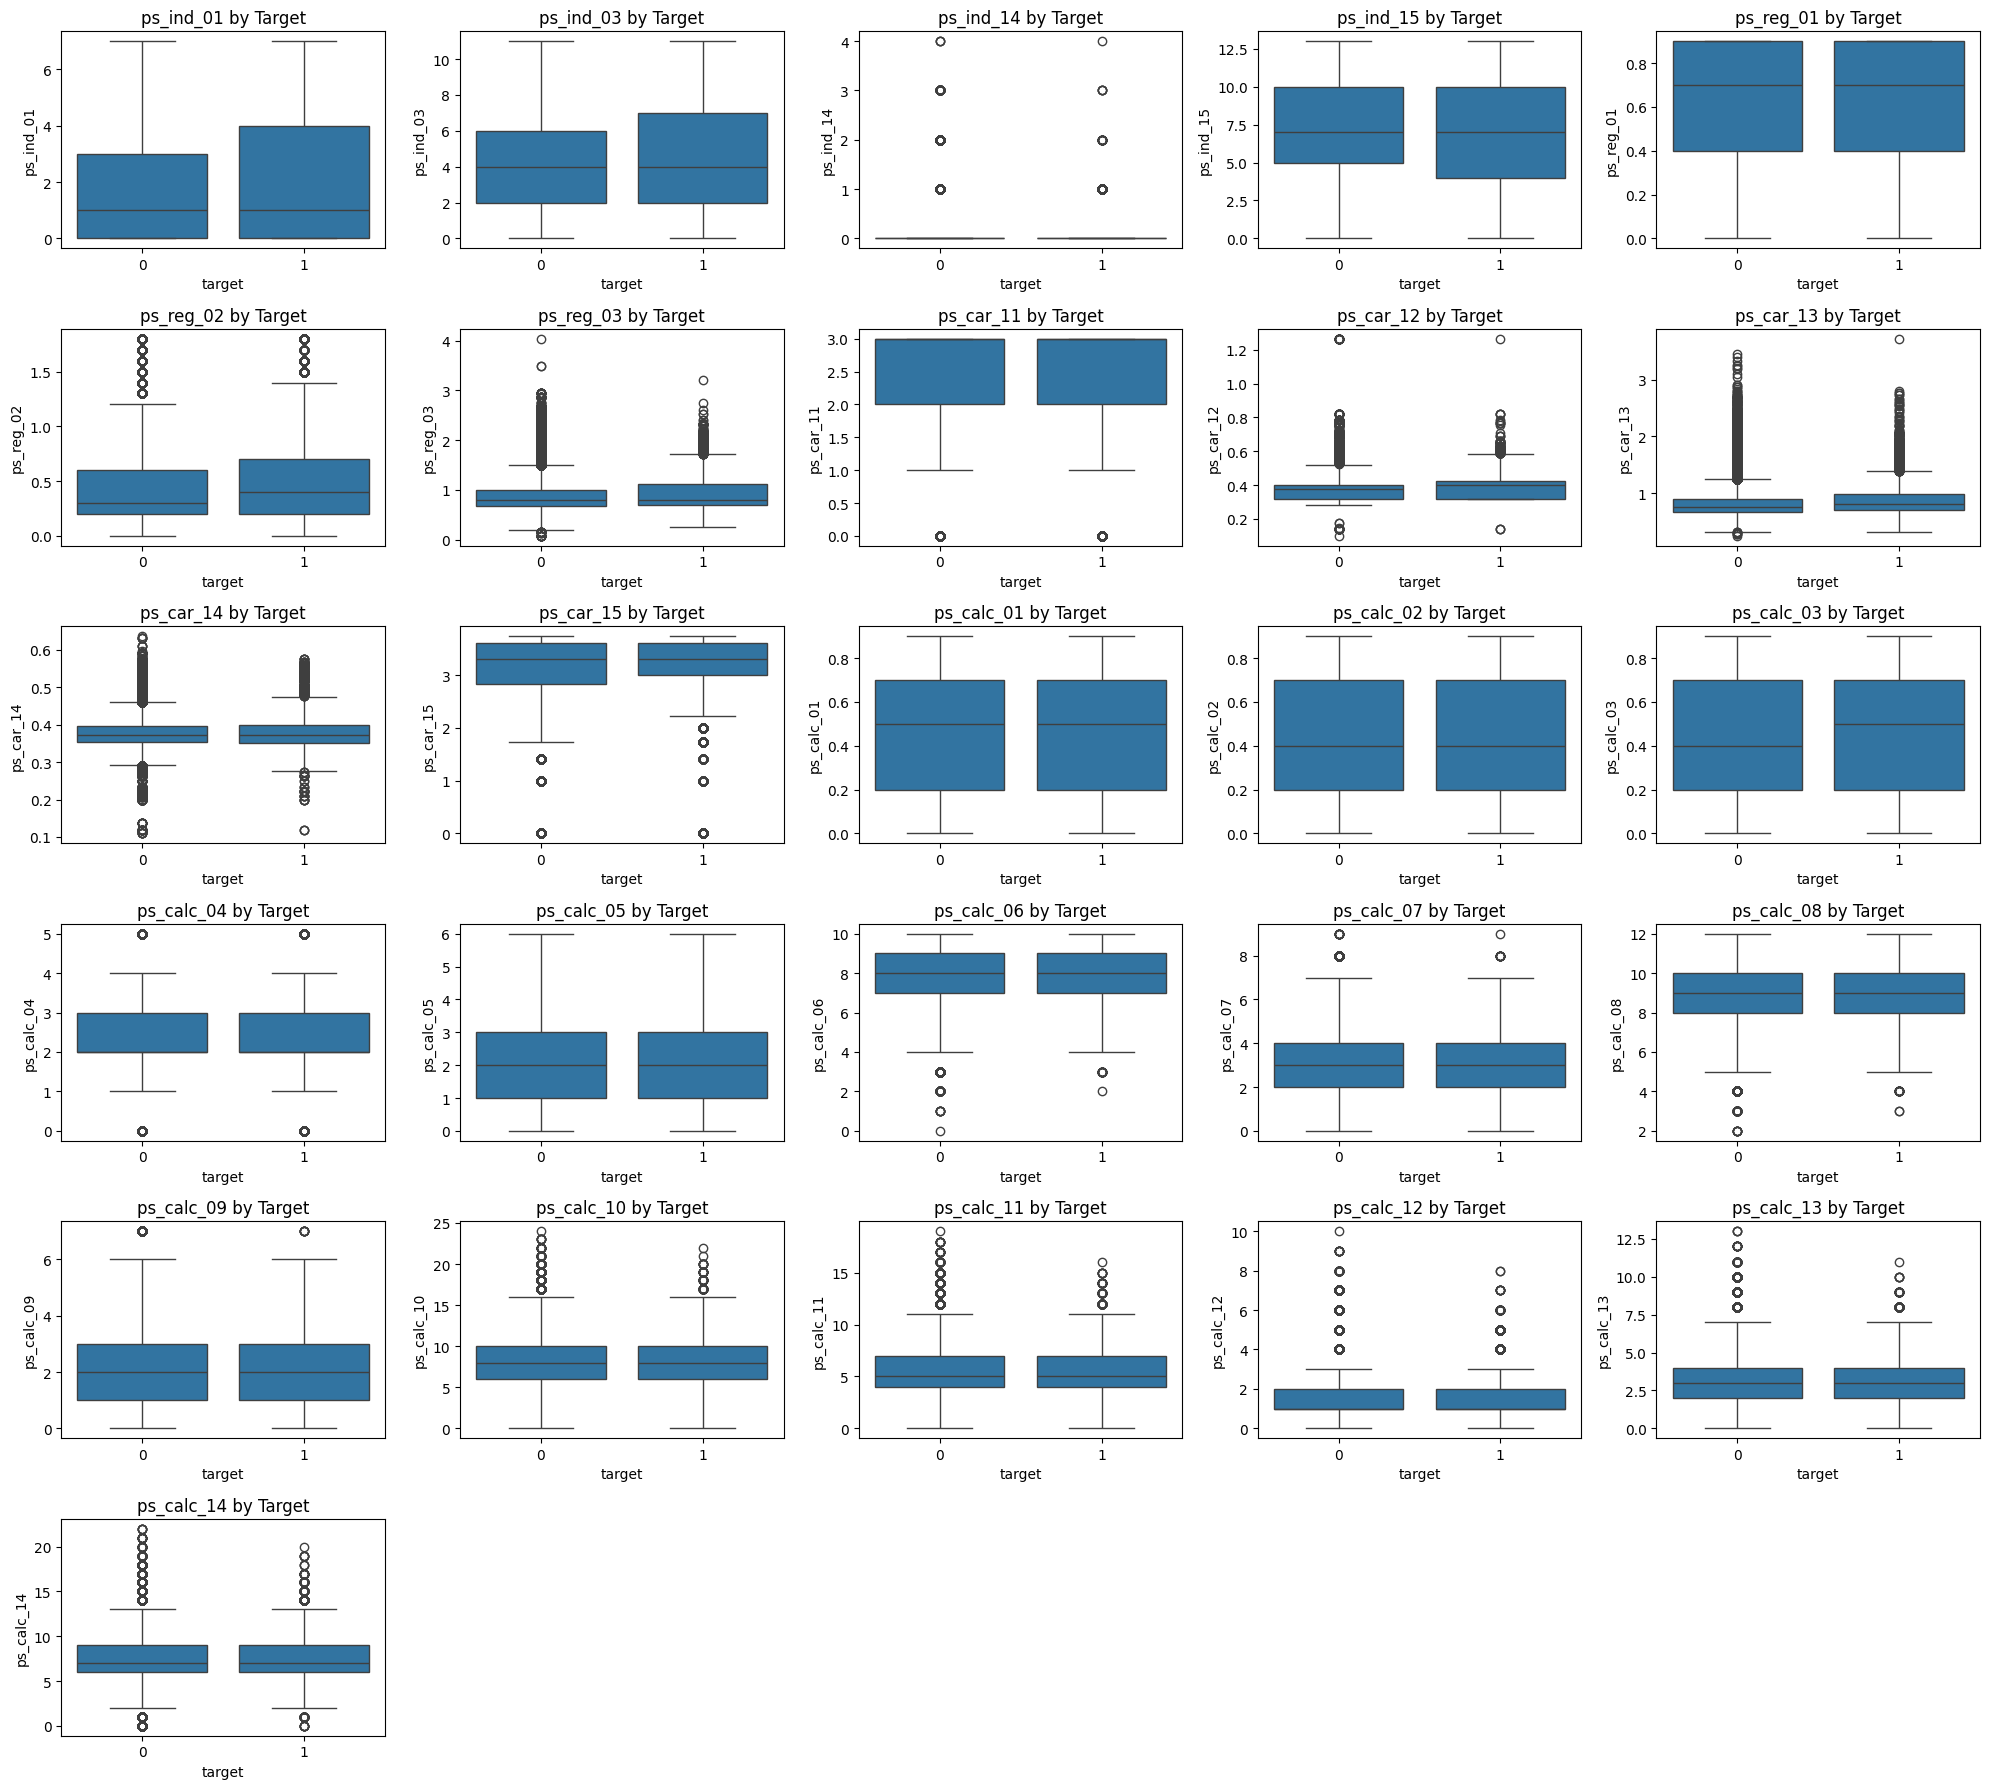

In [ ]:
import seaborn as sns
import math
import matplotlib.pyplot as plt

# Set the number of columns and rows for the subplot grid
num_cols = 5
num_rows = math.ceil(len(num) / num_cols)

# Define overall figure size
fig_width = num_cols * 4
fig_height = num_rows * 3
plt.figure(figsize=(fig_width, fig_height))

# Create boxplots of each numerical feature grouped by the target variable
for i, column in enumerate(num):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x='target', y=column, data=train_copy)
    plt.title(f'{column} by Target')

# Adjust layout to avoid overlapping plots
plt.tight_layout()

# Show the plots
plt.show()

#### some numerical features have relative different distribution

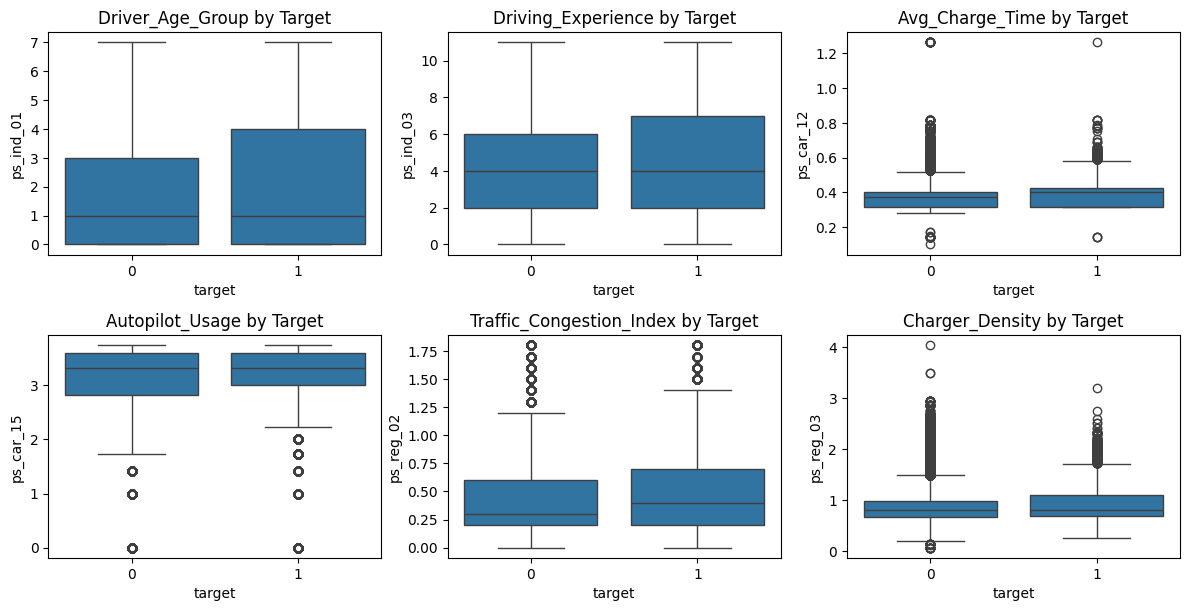

In [ ]:
import seaborn as sns
import math
import matplotlib.pyplot as plt

# Set the number of columns and rows for the subplot grid
num_cols = 3
num_rows = math.ceil(len(num) / num_cols)

# Define overall figure size
fig_width = num_cols * 4
fig_height = num_rows * 3
plt.figure(figsize=(fig_width, fig_height))

num_1 = ['ps_ind_01', 'ps_ind_03', 'ps_car_12', 'ps_car_15', 'ps_reg_02', 'ps_reg_03']
label_1 = ['Driver_Age_Group', 'Driving_Experience', 'Avg_Charge_Time', 'Autopilot_Usage', 'Traffic_Congestion_Index', 'Charger_Density']


for i, (col, lab) in enumerate(zip(num_1, label_1)):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x='target', y=col, data=train_copy)
    plt.title(f'{lab} by Target')

# Adjust layout to avoid overlapping plots
plt.tight_layout()

# Show the plots
plt.show()

#### some numerical features don't have relatively different distribution

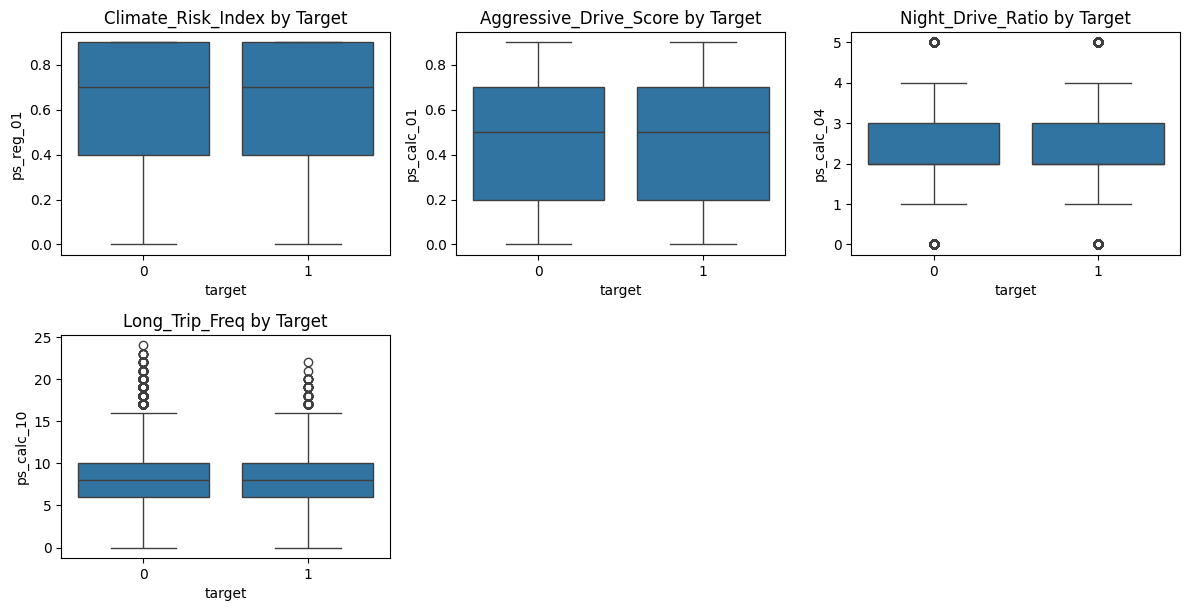

In [ ]:
import seaborn as sns
import math
import matplotlib.pyplot as plt

# Set the number of columns and rows for the subplot grid
num_cols = 3
num_rows = math.ceil(len(num) / num_cols)

# Define overall figure size
fig_width = num_cols * 4
fig_height = num_rows * 3
plt.figure(figsize=(fig_width, fig_height))

num_2 = ['ps_reg_01', 'ps_calc_01', 'ps_calc_04', 'ps_calc_10']
label_2 = ['Climate_Risk_Index', 'Aggressive_Drive_Score', 'Night_Drive_Ratio', 'Long_Trip_Freq']


for i, (col, lab) in enumerate(zip(num_2, label_2)):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x='target', y=col, data=train_copy)
    plt.title(f'{lab} by Target')

# Adjust layout to avoid overlapping plots
plt.tight_layout()

# Show the plots
plt.show()

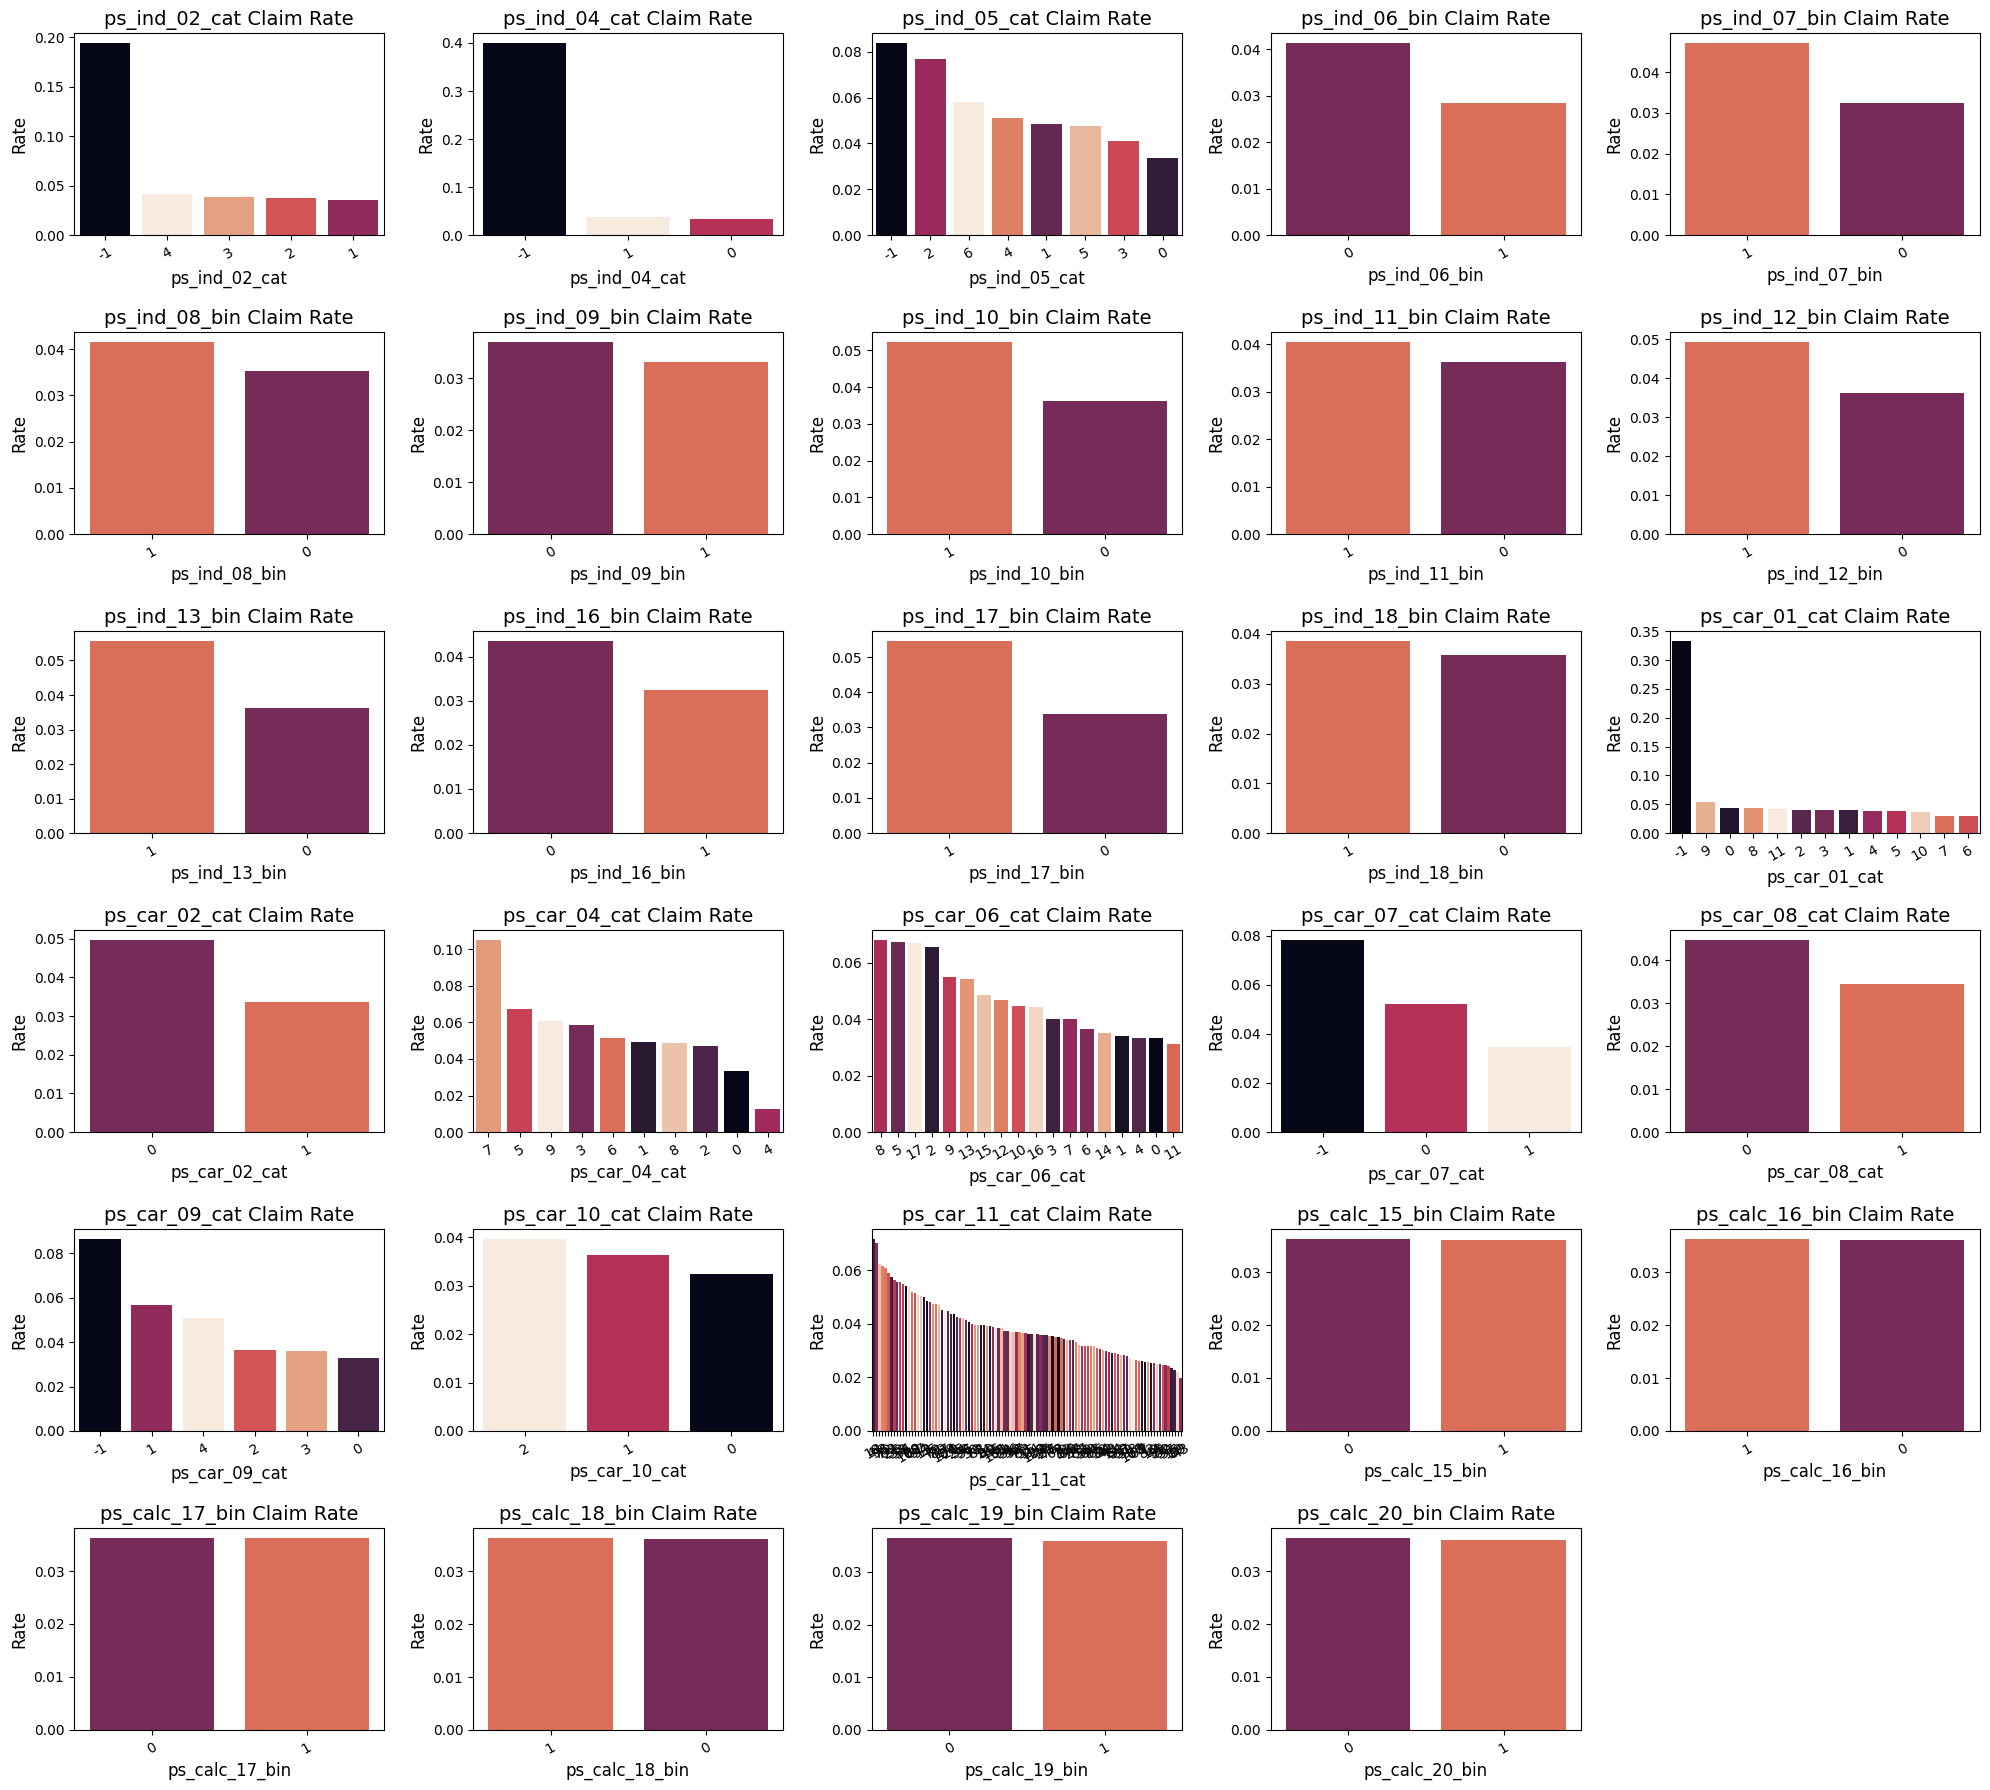

In [ ]:
import seaborn as sns
import math
import matplotlib.pyplot as plt

# Set the number of columns and rows for the subplot grid
num_cols = 5
num_rows = math.ceil(len(cat) / num_cols)
fig_width = num_cols * 4
fig_height = num_rows * 3
plt.figure(figsize=(fig_width, fig_height))

# Plot bar charts showing claim rate per category for each categorical feature
for i, col in enumerate(cat):
    plt.subplot(num_rows, num_cols, i + 1)

    # Calculate claim rate per category
    cat_perc = train_copy[[col, 'target']].groupby(col, as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)

    # Draw barplot with category ordering by claim rate
    sns.barplot(
        x=col, y='target', data=cat_perc,
        order=cat_perc[col], hue=col,
        palette='rocket', legend=False
    )

    # Set plot titles and labels
    plt.title(f'{col} Claim Rate', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Rate', fontsize=12)
    plt.xticks(rotation=30)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

#### some categorical variables have relative different distribution

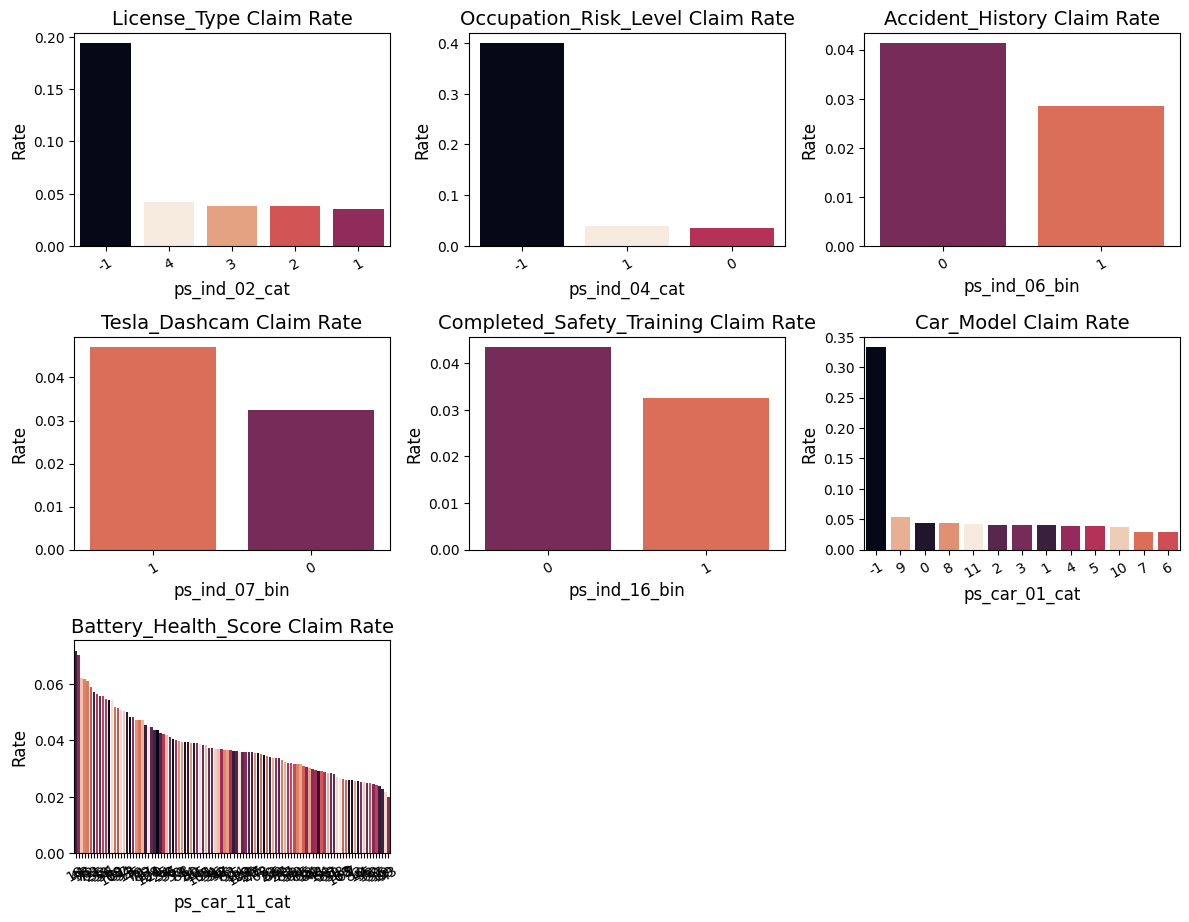

In [ ]:
import seaborn as sns
import math
import matplotlib.pyplot as plt

# Set the number of columns and rows for the subplot grid
num_cols = 3
num_rows = math.ceil(len(cat) / num_cols)
fig_width = num_cols * 4
fig_height = num_rows * 3
plt.figure(figsize=(fig_width, fig_height))


cat_1 = ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_16_bin', 'ps_car_01_cat', 'ps_car_11_cat']
label_1_cat = ['License_Type', 'Occupation_Risk_Level', 'Accident_History', 'Tesla_Dashcam', 'Completed_Safety_Training', 'Car_Model', 'Battery_Health_Score']

for i, (col, lab) in enumerate(zip(cat_1, label_1_cat)):
    plt.subplot(num_rows, num_cols, i + 1)

    # Calculate claim rate per category
    cat_perc = train_copy[[col, 'target']].groupby(col, as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)

    # Draw barplot with category ordering by claim rate
    sns.barplot(
        x=col, y='target', data=cat_perc,
        order=cat_perc[col], hue=col,
        palette='rocket', legend=False
    )

    # Set plot titles and labels
    plt.title(f'{lab} Claim Rate', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Rate', fontsize=12)
    plt.xticks(rotation=30)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

#### some categorical variables don't have relative different distribution

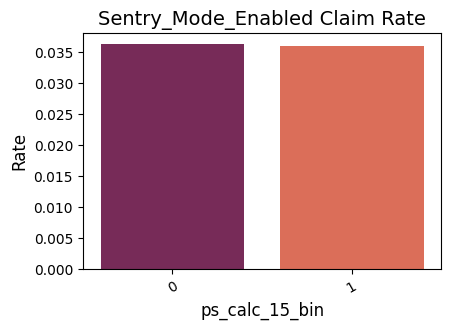

In [ ]:
import seaborn as sns
import math
import matplotlib.pyplot as plt

# Set the number of columns and rows for the subplot grid
num_cols = 3
num_rows = math.ceil(len(cat) / num_cols)
fig_width = num_cols * 4
fig_height = num_rows * 3
plt.figure(figsize=(fig_width, fig_height))

cat_2 = ['ps_calc_15_bin']
label_2_cat = ['Sentry_Mode_Enabled']

for i, (col, lab) in enumerate(zip(cat_2, label_2_cat)):
    plt.subplot(num_rows, num_cols, i + 1)

    # Calculate claim rate per category
    cat_perc = train_copy[[col, 'target']].groupby(col, as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)

    # Draw barplot with category ordering by claim rate
    sns.barplot(
        x=col, y='target', data=cat_perc,
        order=cat_perc[col], hue=col,
        palette='rocket', legend=False
    )

    # Set plot titles and labels
    plt.title(f'{lab} Claim Rate', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Rate', fontsize=12)
    plt.xticks(rotation=30)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()



## Feature Engineering

### Encoding

The categorical variable 'ps_car_11_cat' has over 100 unique categories. Using one-hot encoding would lead to a dimensionality explosion. Therefore, we start with reasonable target encoding parameters for baseline modeling, then optimize encoding and XGBoost parameters in the final tuning stage.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold

# Add random noise to prevent overfitting and target leakage
def add_noise(series, noise_level, random_state=42):
    np.random.seed(random_state)
    return series * (1 + noise_level * np.random.randn(len(series)))

# Target Encoding with 10-fold cross-validation
def target_encode_cv(trn_series=None,
                     tst_series=None,
                     target=None,
                     min_samples_leaf=100,
                     smoothing=10,
                     noise_level=0,
                     random_state=42):
    """
    Performs target encoding with 10-fold cross-validation to prevent target leakage.
    Uses mean of 10-fold encodings for test data to improve robustness.

    Parameters:
    - trn_series (pd.Series): Categorical feature from the training set
    - tst_series (pd.Series): Categorical feature from the test set
    - target (pd.Series): Target values for training data
    - min_samples_leaf (int): Minimum samples to consider a category's mean reliable
    - smoothing (int or float): Smoothing effect to balance category mean vs. overall mean
    - noise_level (float): Random noise level to add to encoded values
    - random_state (int): Random seed for reproducibility

    Returns:
    - Encoded training and test series (with noise added if specified)
    """
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name

    # Initialize encoded training series
    ft_trn_series = pd.Series(index=trn_series.index, dtype=float)
    ft_trn_series.name = trn_series.name + '_mean'

    # Global target mean (fallback value)
    prior = target.mean()

    # Store encodings from each fold for test data
    fold_encodings = {}

    # 10-fold cross-validation
    kfold = KFold(n_splits=10, shuffle=True, random_state=random_state)

    for fold_idx, (train_idx, val_idx) in enumerate(kfold.split(trn_series)):
        # Split data for current fold
        trn_fold_series = trn_series.iloc[train_idx]
        trn_fold_target = target.iloc[train_idx]
        val_fold_series = trn_series.iloc[val_idx]

        # Create temporary dataframe for fold training data
        temp = pd.concat([trn_fold_series, trn_fold_target], axis=1)

        # Compute target mean and count for each category in fold
        averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])

        # Compute smoothing weights using sigmoid function
        smoothing_weights = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))

        # Fold-specific prior (mean of fold training data)
        fold_prior = trn_fold_target.mean()

        # Compute smoothed averages
        averages['smoothed_mean'] = fold_prior * (1 - smoothing_weights) + averages["mean"] * smoothing_weights

        # Store this fold's encoding for test data (mean of 10-fold approach)
        fold_encodings[fold_idx] = averages['smoothed_mean'].to_dict()

        # Map validation fold data for training encoding
        val_encoded = val_fold_series.map(averages['smoothed_mean']).fillna(fold_prior)
        ft_trn_series.iloc[val_idx] = val_encoded

    # Compute mean encoding across all folds for test data (more robust)
    all_categories = set()
    for fold_dict in fold_encodings.values():
        all_categories.update(fold_dict.keys())

    mean_encodings = {}
    for category in all_categories:
        fold_values = []
        for fold_dict in fold_encodings.values():
            if category in fold_dict:
                fold_values.append(fold_dict[category])

        # Use mean of available fold encodings for better stability
        if fold_values:
            mean_encodings[category] = np.mean(fold_values)
        else:
            mean_encodings[category] = prior

    # Encode test data using mean of 10-fold encodings
    ft_tst_series = tst_series.map(mean_encodings).fillna(prior)
    ft_tst_series.name = trn_series.name + '_mean'

    # Add noise if specified
    if noise_level > 0:
        ft_trn_series = add_noise(ft_trn_series, noise_level, random_state)
        ft_tst_series = add_noise(ft_tst_series, noise_level, random_state + 1)  # Different seed for test

    return ft_trn_series, ft_tst_series

    # Apply target encoding with CV
    trn_encoded, tst_encoded = target_encode_cv(
        trn_series=trn_cat,
        tst_series=tst_cat,
        target=target,
        min_samples_leaf=20,
        smoothing=10,
        noise_level=0.01,
        random_state=42
    )


In [ ]:
train_encoded, test_encoded = target_encode_cv(train_copy['ps_car_11_cat'],
                             test_copy['ps_car_11_cat'],
                             target=train_copy.target,
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)

In [ ]:
# Append the target-encoded version of 'ps_car_11_cat'
train_copy['ps_car_11_cat_enc'] = train_encoded
test_copy['ps_car_11_cat_enc'] = test_encoded

# Backup the original 'ps_car_11_cat' column
ps_car_11_cat_train = train_copy['ps_car_11_cat'].copy()
ps_car_11_cat_test = test_copy['ps_car_11_cat'].copy()

# Drop the original 'ps_car_11_cat' column from both datasets
train_copy.drop('ps_car_11_cat', axis=1, inplace=True)
test_copy.drop('ps_car_11_cat', axis=1, inplace=True)


In [ ]:
num = num + ['ps_car_11_cat_enc']
num

['ps_ind_01',
 'ps_ind_03',
 'ps_ind_14',
 'ps_ind_15',
 'ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14',
 'ps_car_11_cat_enc']

In [ ]:
cat = [col for col in cat if col != 'ps_car_11_cat']
cat

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_04_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin']

### Initial Feature Selection

#### Remove low Variance features

In [ ]:
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

X = train_copy.drop(columns=['id', 'target']).copy()

# numerical features
vt_num = VarianceThreshold(threshold=1e-5)
X_num_support = vt_num.fit(X[num]).get_support()
removed_num = list(X[num].columns[~X_num_support])
X_num = X[num].loc[:, X_num_support]

# categorical features
vt_cat = VarianceThreshold(threshold=0.0099)
X_cat_support = vt_cat.fit(X[cat]).get_support()
removed_cat = list(X[cat].columns[~X_cat_support])
X_cat = X[cat].loc[:, X_cat_support]

# print removal features
removed_vars = removed_num + removed_cat
print(f"{len(removed_vars)} variables have too low variance.")
print(f"These variables are {removed_vars}")


5 variables have too low variance.
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_10_cat']


#### numerical variables pearson correlation

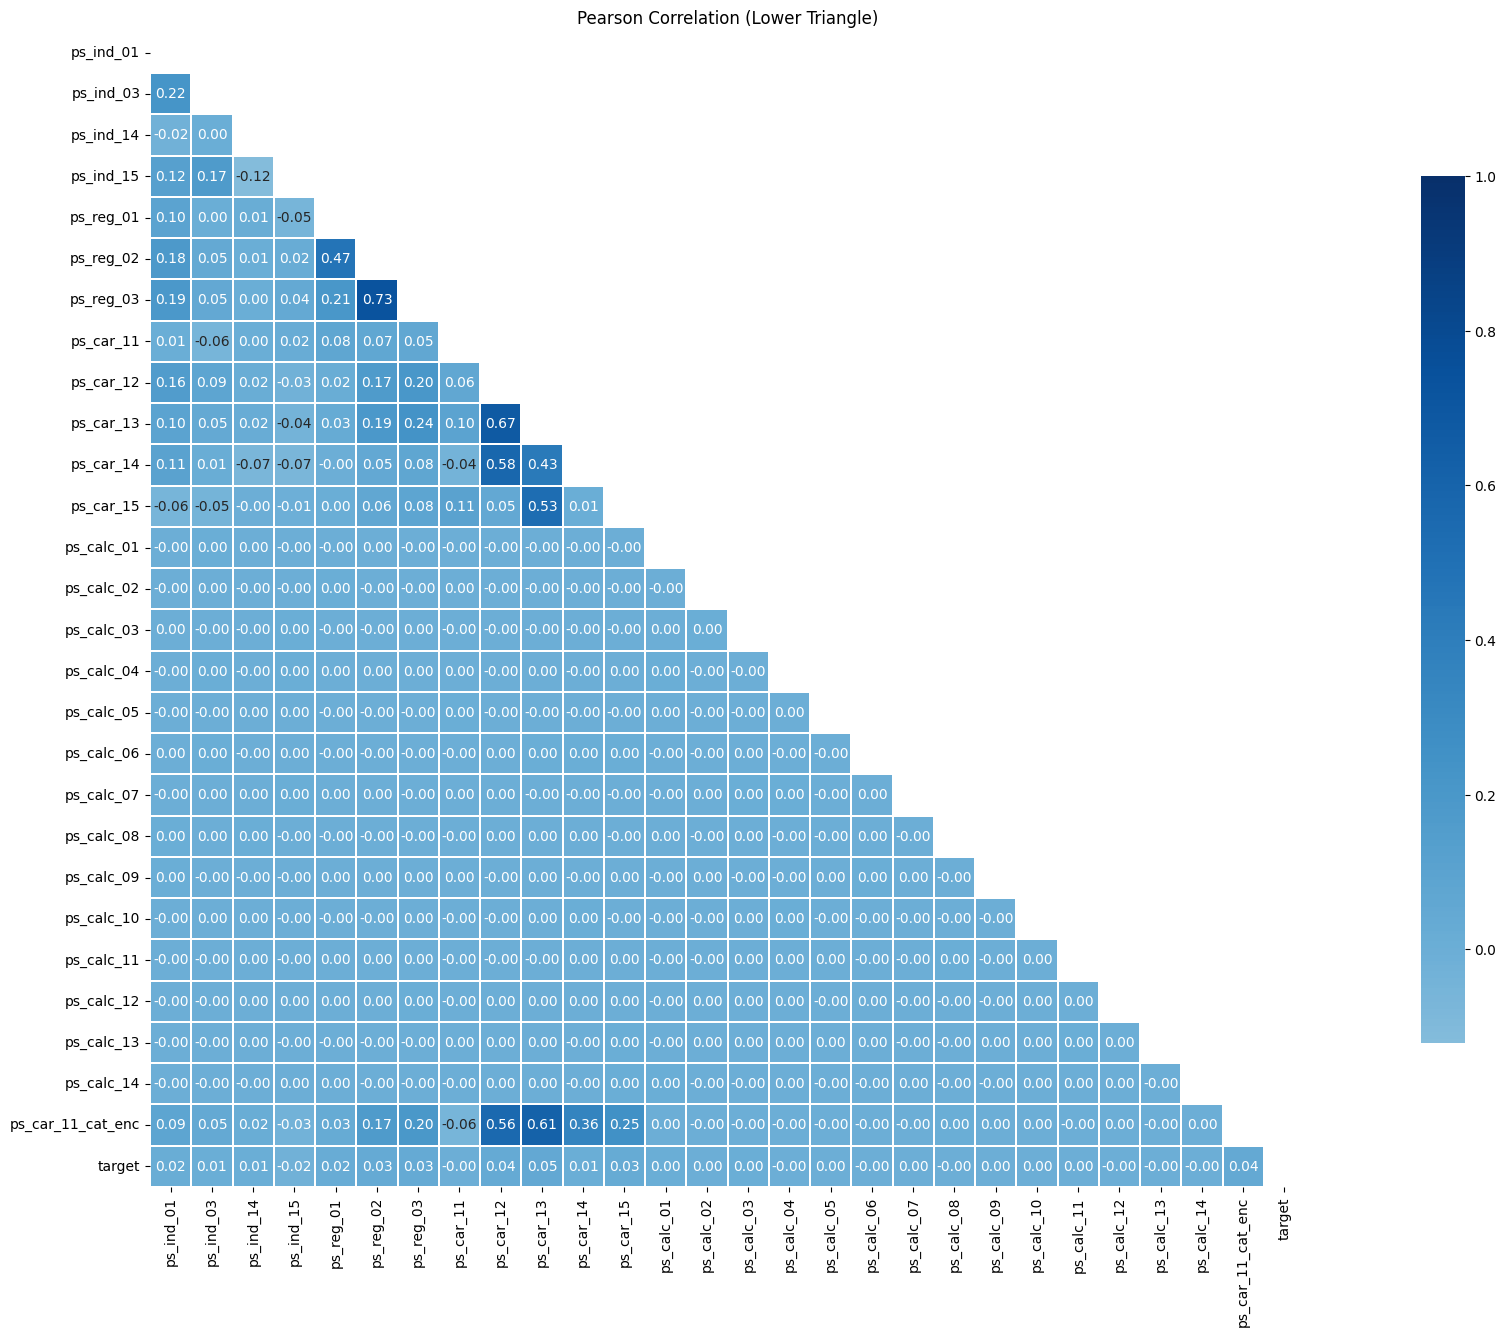

In [ ]:
corr_pearson = train_copy[num + target].corr(method='pearson')

# mask upper triangle
mask = np.triu(np.ones_like(corr_pearson, dtype=bool))

plt.figure(figsize=(30, 15))
sns.heatmap(
    corr_pearson,
    mask=mask,
    vmax=1,
    center=0,
    square=True,
    annot=True,
    fmt='.2f',
    cmap='Blues',
    linewidths=.3,
    cbar_kws={"shrink": .75}
)
plt.title("Pearson Correlation (Lower Triangle)")
plt.show()


#### numerical variables spearman correlation

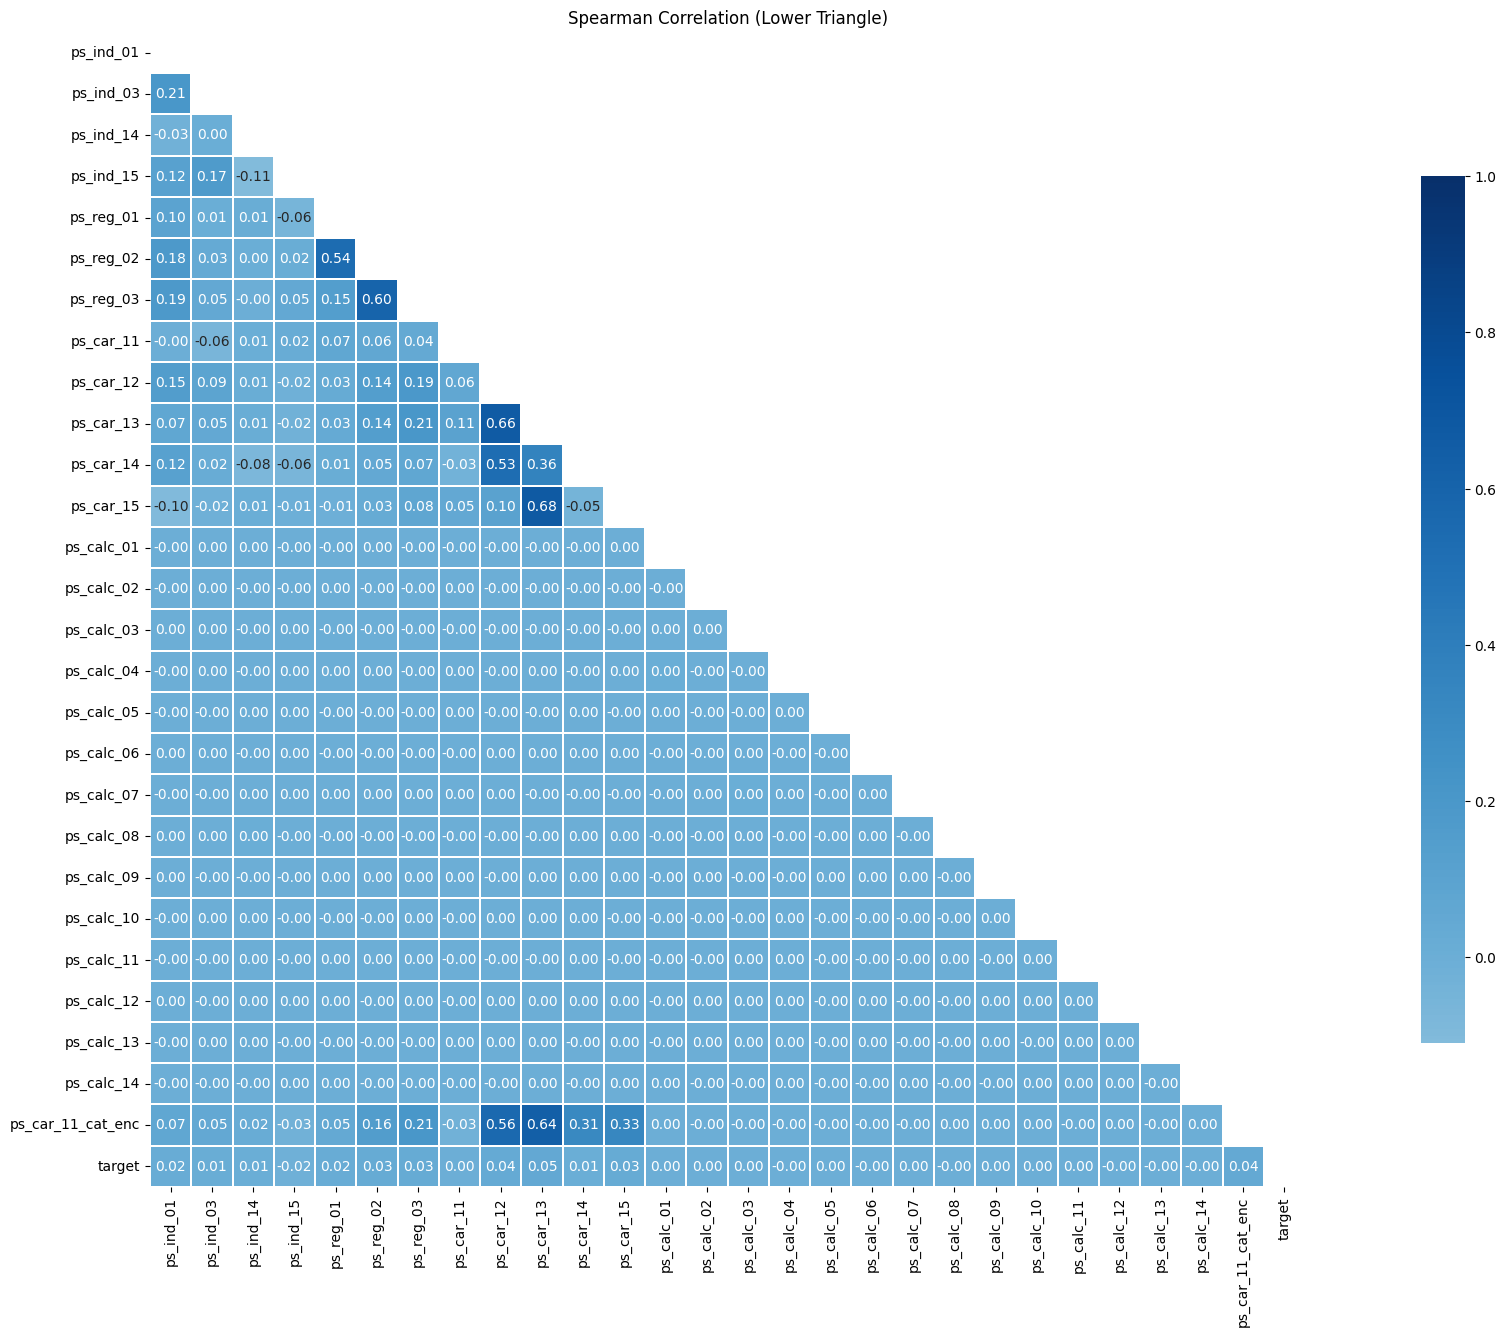

In [ ]:
corr_spearman = train_copy[num + target].corr(method='spearman')

# mask uppper triangle
mask = np.triu(np.ones_like(corr_spearman, dtype=bool))

plt.figure(figsize=(30, 15))
sns.heatmap(
    data=corr_spearman,
    mask=mask,
    vmax=1,
    center=0,
    square=True,
    annot=True,
    fmt='.2f',
    cmap='Blues',
    linewidths=.3,
    cbar_kws={"shrink": .75}
)
plt.title("Spearman Correlation (Lower Triangle)")
plt.show()

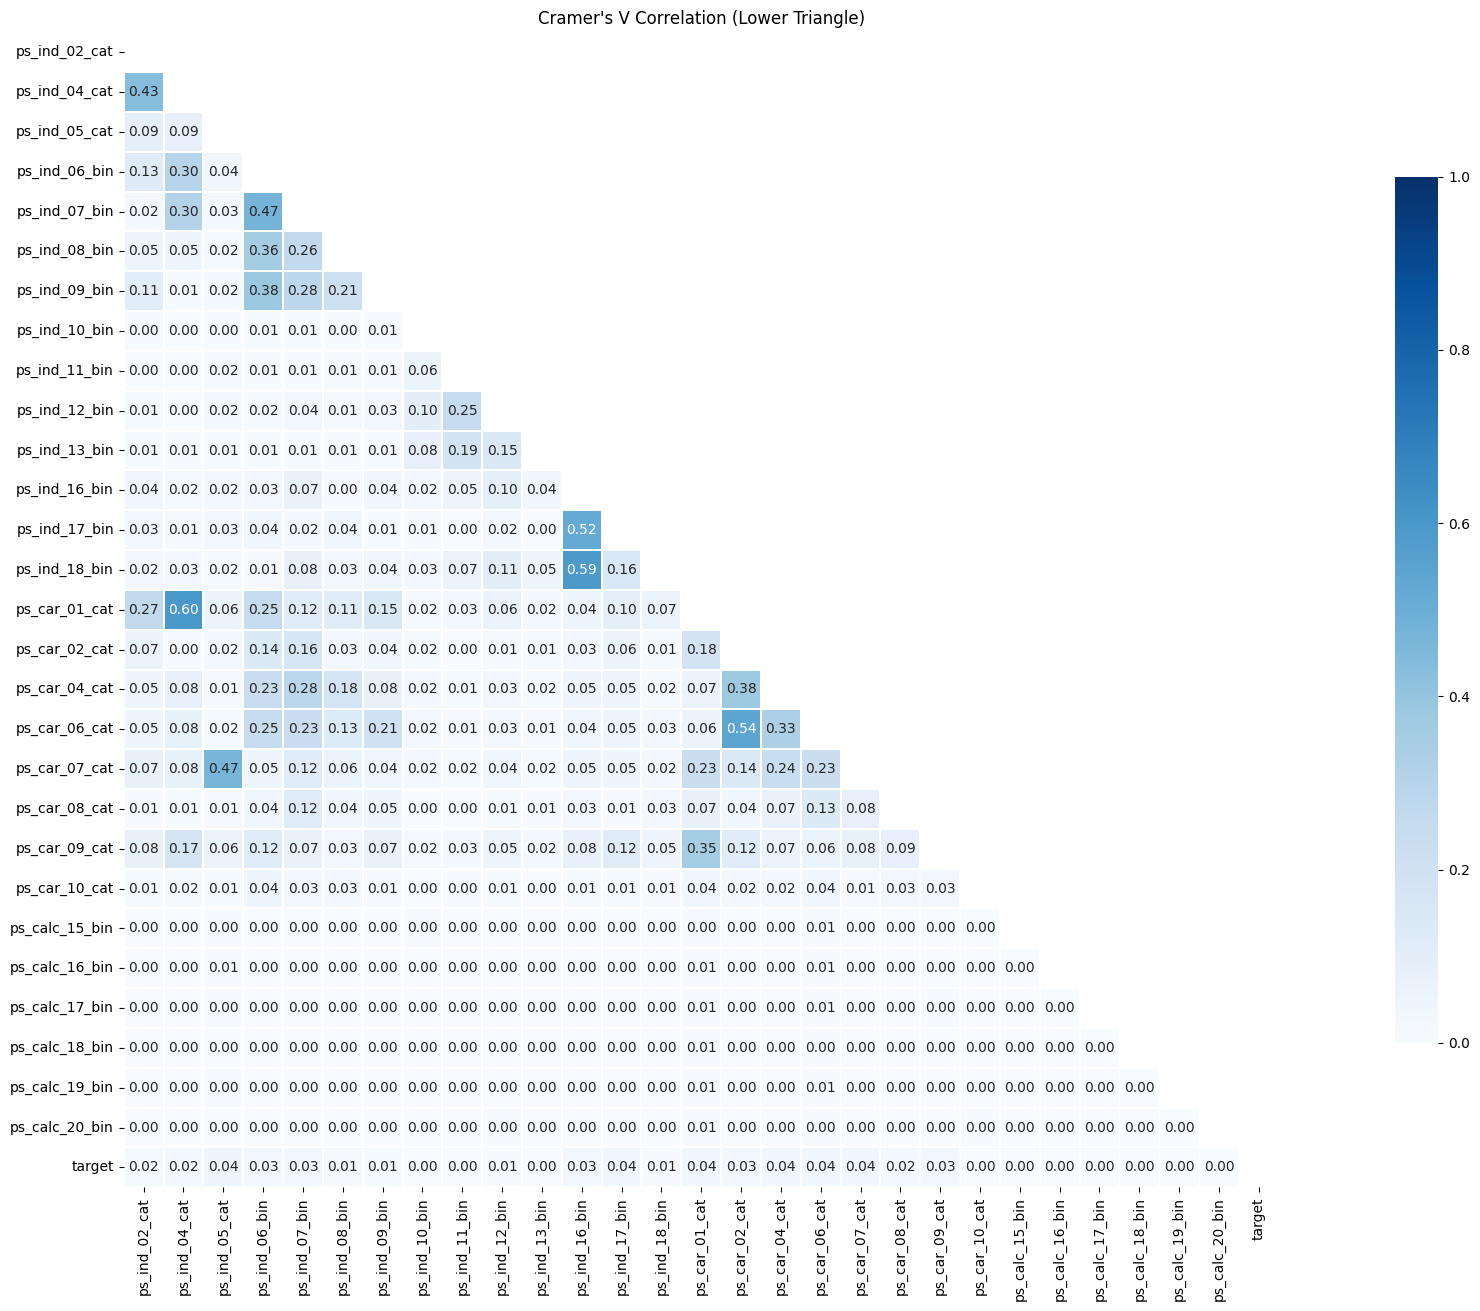

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

def cramers_v(x, y):
    mask = x.notna() & y.notna()
    if mask.sum() == 0:
        return np.nan
    cm = pd.crosstab(x[mask], y[mask])
    if cm.shape[0] < 2 or cm.shape[1] < 2:
        return np.nan
    chi2 = chi2_contingency(cm)[0]
    n = cm.to_numpy().sum()
    r, k = cm.shape
    denom = min(k - 1, r - 1)
    return np.sqrt((chi2 / n) / denom) if denom > 0 else np.nan

def cramers_v_matrix(df):
    cols = df.columns.tolist()
    M = pd.DataFrame(np.zeros((len(cols), len(cols))), index=cols, columns=cols, dtype=float)
    for i, c1 in enumerate(cols):
        for j, c2 in enumerate(cols):
            if j < i:
                M.iloc[i, j] = M.iloc[j, i]
            else:
                M.iloc[i, j] = cramers_v(df[c1], df[c2])
    np.fill_diagonal(M.values, 1.0)
    return M

cols_to_corr = cat + target
corr_cramers = cramers_v_matrix(train_copy[cols_to_corr])

mask = np.triu(np.ones_like(corr_cramers, dtype=bool))

# Plot
plt.figure(figsize=(30, 15))
sns.heatmap(
    corr_cramers,
    mask=mask,
    vmax=1, vmin=0, center=0.5,
    square=True,
    annot=True, fmt='.2f',
    cmap='Blues',
    linewidths=.3,
    cbar_kws={"shrink": .75}
)
plt.title("Cramer's V Correlation (Lower Triangle)")
plt.show()



### Feature Interaction
To capture non-linear relationships and higher-order effects between numerical features, we generated interaction terms between selected continuous variables. These interactions can help the model learn combined effects that may not be evident when features are treated independently. Categorical features were excluded from interaction generation to avoid excessive dimensionality.

In [ ]:
num_interact = num

from sklearn.preprocessing import PolynomialFeatures

# Create interaction-only polynomial features (no squared terms, no bias)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# Generate interaction features from numerical columns
interactions = pd.DataFrame(
    data=poly.fit_transform(train_copy[num_interact]),
    columns=poly.get_feature_names_out(num_interact)
)

# Remove original numerical columns from the interactions DataFrame
interactions.drop(num_interact, axis=1, inplace=True)

# Print number of features before adding interactions
print(f'Before feature interaction, training set has {train_copy.shape[1]} features')

# Concatenate interaction features to the original training DataFrame
train_copy = pd.concat([train_copy, interactions], axis=1)

# Print number of features after adding interactions
print(f'After feature interaction, training set has {train_copy.shape[1]} features')

Before feature interaction, training set has 57 features
After feature interaction, training set has 408 features


In [ ]:
# Generate interaction features for the test set using the same transformation
interactions_test = pd.DataFrame(
    data=poly.transform(test_copy[num_interact]),
    columns=poly.get_feature_names_out(num_interact)
)

# Remove original numerical columns from the interactions DataFrame
interactions_test.drop(num_interact, axis=1, inplace=True)

# Concatenate interaction features to the original test DataFrame
test_copy = pd.concat([test_copy, interactions_test], axis=1)


### Feature Selection

In [ ]:
import pandas as pd
import numpy as np

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import roc_auc_score

X = train_copy.drop(columns=['id', 'target']).copy()
y = train_copy['target'].copy()

# Convert nominal columns to 'category' dtype
X[cat] = X[cat].apply(lambda col: col.astype('category'))


# Train validation split
X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Class imbalance
pos, neg = (y_tr == 1).sum(), (y_tr == 0).sum()
scale_pos_weight = neg / max(pos, 1)

# Train an light XGBoost model
xgb = XGBClassifier(
    tree_method='hist',
    enable_categorical=True,
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    min_child_weight=5,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=2.0,
    reg_lambda=5.0,
    eval_metric='auc',
    random_state=42,
    scale_pos_weight=scale_pos_weight
)

xgb.fit(
    X_tr, y_tr,
    eval_set=[(X_val, y_val)],
    verbose=False
)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
print("Valid AUC:", roc_auc_score(y_val, xgb.predict_proba(X_val)[:,1]))

Valid AUC: 0.6350296889734285


In [ ]:
# Gain importance
booster = xgb.get_booster()
gain_raw = booster.get_score(importance_type='gain')
gain_s = pd.Series(gain_raw).reindex(X.columns).fillna(0.0).sort_values(ascending=False)

#  Weight importance
weight_raw = booster.get_score(importance_type='weight')
weight_s = pd.Series(weight_raw).reindex(X.columns).fillna(0.0).sort_values(ascending=False)

# Filter with median
gain_selected = set(gain_s[gain_s >= gain_s.median()].index)
weight_selected = set(weight_s[weight_s >= weight_s.median()].index)

# Filter with cross intersection
final_selected = sorted(gain_selected & weight_selected)
X_final = X[final_selected]

print(f"Final selected features ({len(final_selected)}): {final_selected}")


Final selected features (122): ['ps_calc_01 ps_calc_12', 'ps_calc_01 ps_calc_14', 'ps_calc_01 ps_car_11_cat_enc', 'ps_calc_02 ps_calc_10', 'ps_calc_04 ps_car_11_cat_enc', 'ps_calc_05 ps_car_11_cat_enc', 'ps_calc_06 ps_calc_14', 'ps_calc_06 ps_car_11_cat_enc', 'ps_calc_07 ps_calc_10', 'ps_calc_07 ps_calc_11', 'ps_calc_07 ps_calc_14', 'ps_calc_09 ps_calc_10', 'ps_calc_09 ps_calc_14', 'ps_calc_10 ps_calc_14', 'ps_calc_12 ps_car_11_cat_enc', 'ps_calc_13 ps_car_11_cat_enc', 'ps_car_01_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_09_cat', 'ps_car_11 ps_calc_10', 'ps_car_11 ps_calc_11', 'ps_car_11 ps_car_13', 'ps_car_11_cat_enc', 'ps_car_12 ps_calc_02', 'ps_car_12 ps_car_11_cat_enc', 'ps_car_12 ps_car_13', 'ps_car_12 ps_car_14', 'ps_car_13', 'ps_car_13 ps_calc_05', 'ps_car_13 ps_calc_08', 'ps_car_13 ps_calc_09', 'ps_car_13 ps_calc_10', 'ps_car_13 ps_calc_12', 'ps_car_13 ps_calc_13', 'ps_car_13 ps_calc_14', 'ps_car_13 ps_car_11_cat_enc', 'ps_car_13 ps_car_14', 'ps_car_14', 'ps_car_14 ps_cal

In [ ]:
final_selected

['ps_calc_01 ps_calc_12',
 'ps_calc_01 ps_calc_14',
 'ps_calc_01 ps_car_11_cat_enc',
 'ps_calc_02 ps_calc_10',
 'ps_calc_04 ps_car_11_cat_enc',
 'ps_calc_05 ps_car_11_cat_enc',
 'ps_calc_06 ps_calc_14',
 'ps_calc_06 ps_car_11_cat_enc',
 'ps_calc_07 ps_calc_10',
 'ps_calc_07 ps_calc_11',
 'ps_calc_07 ps_calc_14',
 'ps_calc_09 ps_calc_10',
 'ps_calc_09 ps_calc_14',
 'ps_calc_10 ps_calc_14',
 'ps_calc_12 ps_car_11_cat_enc',
 'ps_calc_13 ps_car_11_cat_enc',
 'ps_car_01_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_09_cat',
 'ps_car_11 ps_calc_10',
 'ps_car_11 ps_calc_11',
 'ps_car_11 ps_car_13',
 'ps_car_11_cat_enc',
 'ps_car_12 ps_calc_02',
 'ps_car_12 ps_car_11_cat_enc',
 'ps_car_12 ps_car_13',
 'ps_car_12 ps_car_14',
 'ps_car_13',
 'ps_car_13 ps_calc_05',
 'ps_car_13 ps_calc_08',
 'ps_car_13 ps_calc_09',
 'ps_car_13 ps_calc_10',
 'ps_car_13 ps_calc_12',
 'ps_car_13 ps_calc_13',
 'ps_car_13 ps_calc_14',
 'ps_car_13 ps_car_11_cat_enc',
 'ps_car_13 ps_car_14',
 'ps_car_14',
 'ps_car_1

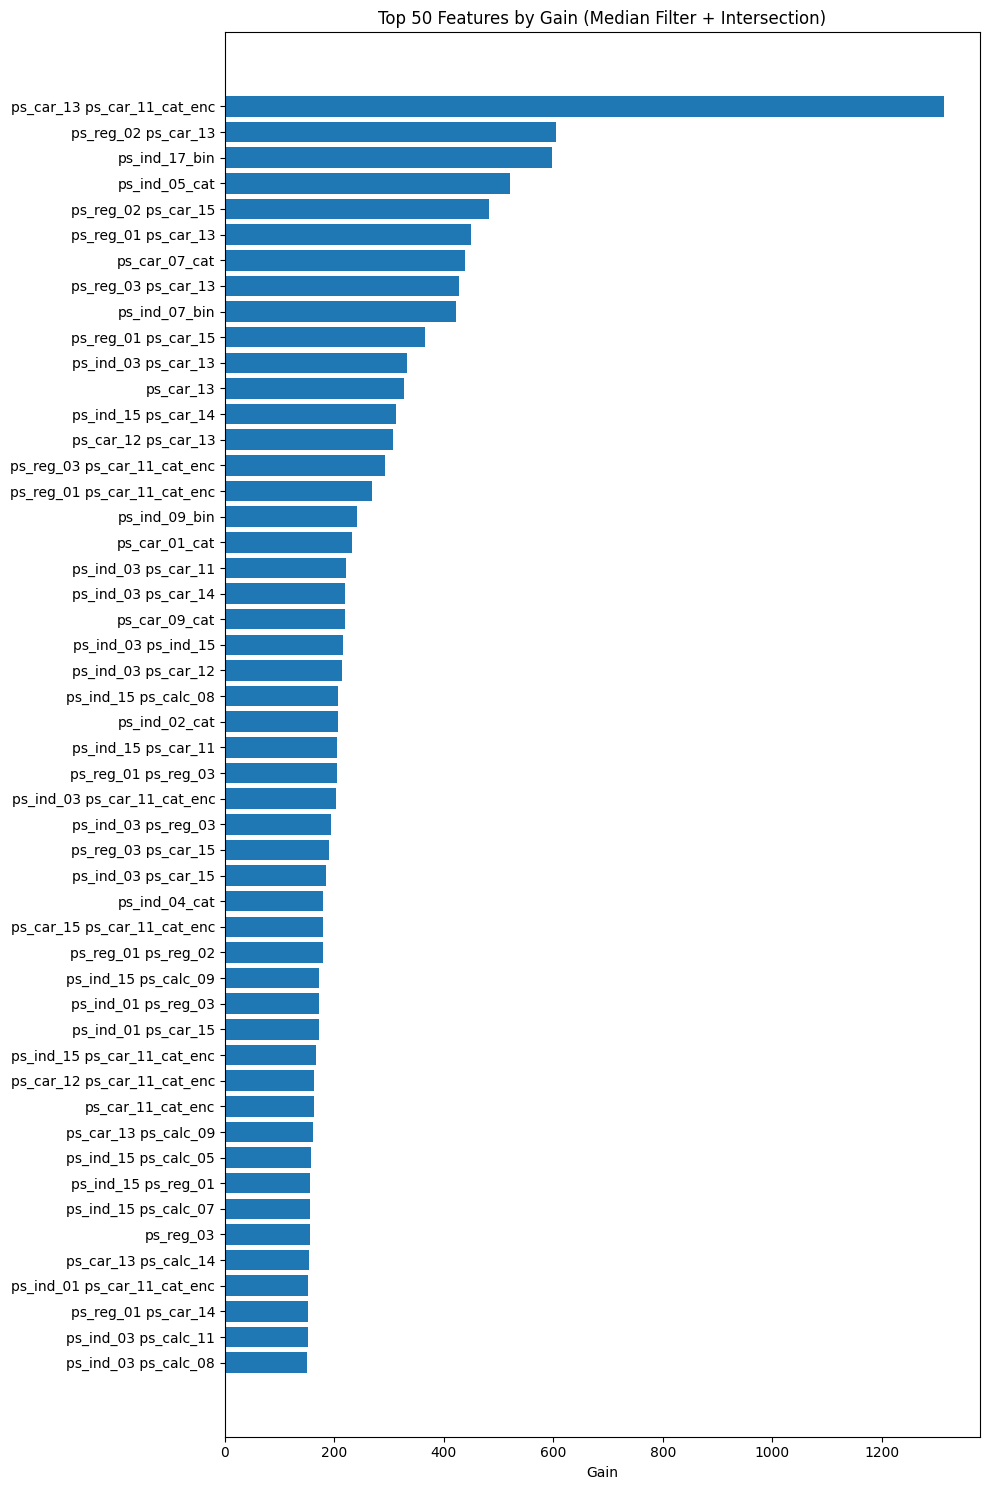

In [ ]:
# ===== Top 50 Features（Gain）=====
top_gain = gain_s.loc[final_selected].sort_values(ascending=False).head(50).iloc[::-1]
plt.figure(figsize=(10, max(6, 0.3 * len(top_gain))))
plt.barh(top_gain.index, top_gain.values)
plt.xlabel("Gain")
plt.title("Top 50 Features by Gain (Median Filter + Intersection)")
plt.tight_layout()
plt.show()


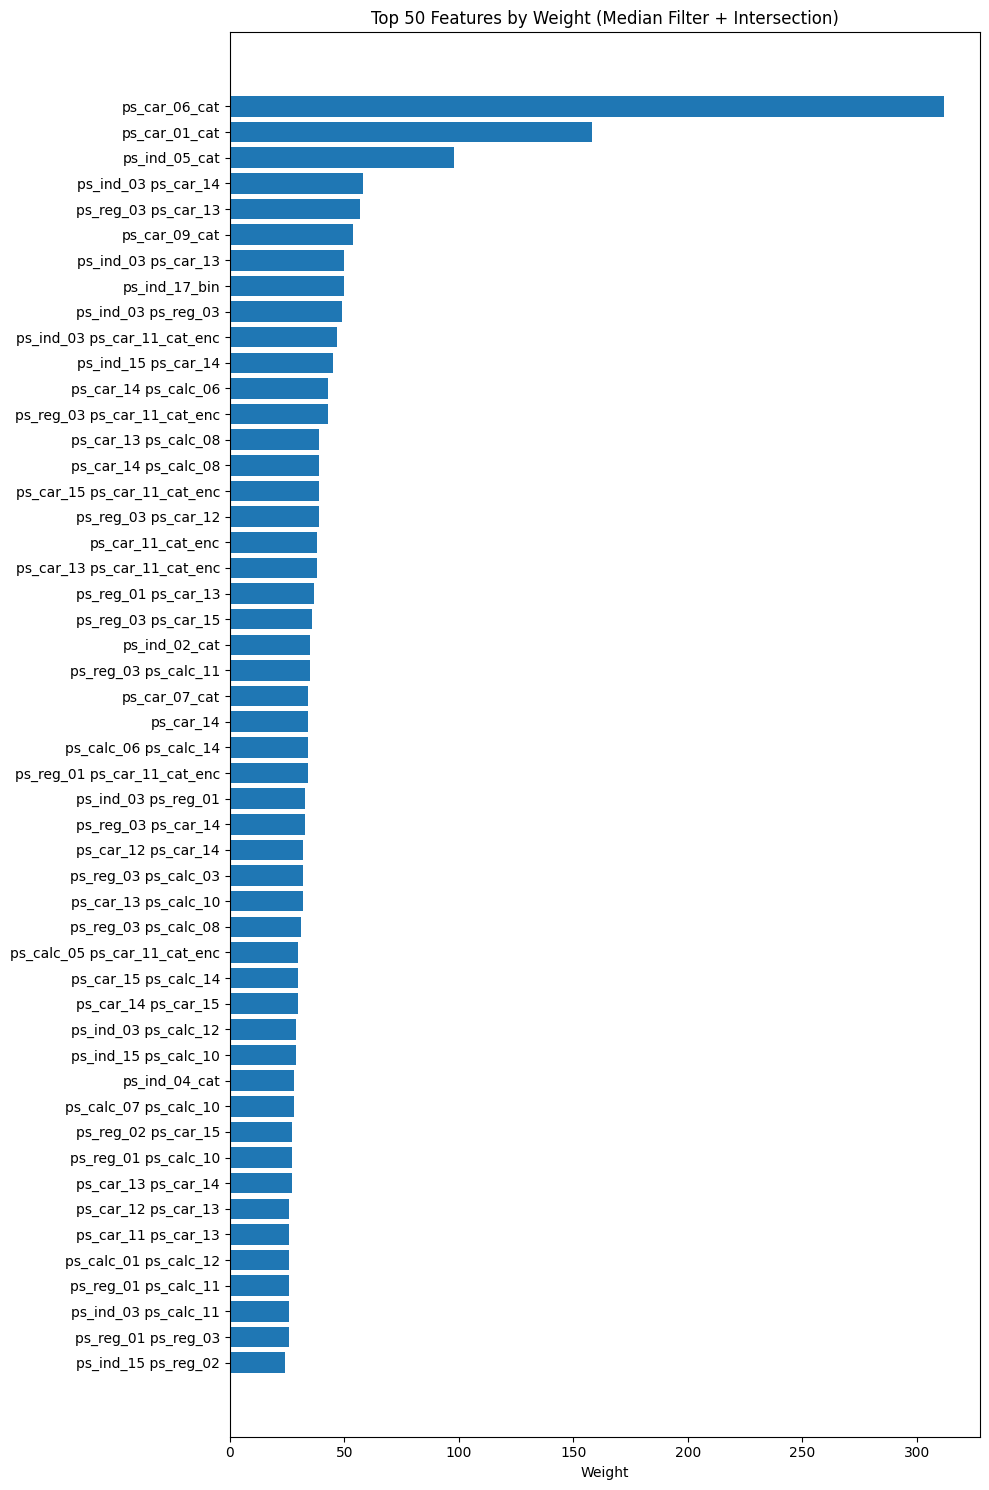

In [ ]:
# =====  Top 50 Features（Weight）=====
top_weight = weight_s.loc[final_selected].sort_values(ascending=False).head(50).iloc[::-1]
plt.figure(figsize=(10, max(6, 0.3 * len(top_weight))))
plt.barh(top_weight.index, top_weight.values)
plt.xlabel("Weight")
plt.title("Top 50 Features by Weight (Median Filter + Intersection)")
plt.tight_layout()
plt.show()

In [ ]:
train_copy = train_copy[final_selected +['target']]
test_copy = train_copy[final_selected +['target']]

In [ ]:
cat = [col for col in train_copy.columns if (('cat' in col) or ('bin' in col)) and ('ps_car_11_cat_enc' not in col)]
cat

['ps_car_01_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_09_cat',
 'ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_ind_07_bin',
 'ps_ind_09_bin',
 'ps_ind_17_bin']

In [ ]:
num = [col for col in train_copy.columns if (col not in cat) and (col != 'target')]

In [ ]:
train_final = train_copy
test_final = test_copy

## Model Development & Tuning

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 16.7 MB/s eta 0:00:00


In [ ]:
# =============================
# ✅ Reusable CV + Optuna + XGBoost Framework (with Ensemble Subsampling Option)
# Supports numeric + categorical features
# Uses random undersampling instead of SMOTE
# =============================

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_score, recall_score
from xgboost import XGBClassifier
import optuna
import matplotlib.pyplot as plt

# =============================
# 🔧 Configurable Parameters
# =============================
random_state = 42
n_splits = 10

# =============================
# 🧠 Step 1: Evaluate AUC with CV (baseline evaluation only)
# =============================
def evaluate_with_cv(df, target_col, cat, num, xgb_params, early_stopping_rounds=30, verbose=False, return_details=False, desired_pos_ratio_undersample=0.05):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    X = df.drop(columns=[target_col])
    y = df[target_col]
    aucs = []

    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        X_train, y_train = X.iloc[train_idx].copy(), y.iloc[train_idx].copy()
        X_val, y_val = X.iloc[val_idx].copy(), y.iloc[val_idx].copy()

        idx_0 = y_train[y_train == 0].index
        idx_1 = y_train[y_train == 1].index
        n1 = len(idx_1)
        np.random.seed(random_state + fold)
        idx_0_sub = np.random.choice(idx_0, size=int(n1 / desired_pos_ratio_undersample), replace=False)
        combined_idx = np.concatenate([idx_0_sub, idx_1])

        X_sub = X_train.loc[combined_idx].reset_index(drop=True)
        y_sub = y_train.loc[combined_idx].reset_index(drop=True)

        neg = (y_sub == 0).sum()
        pos = (y_sub == 1).sum()
        spw = neg / pos

        X_enc = pd.concat([
            X_sub[num],
            X_sub[cat].apply(lambda s: s.astype('category'))
        ], axis=1)
        X_val_enc = pd.concat([
            X_val[num],
            X_val[cat].apply(lambda s: s.astype('category'))
        ], axis=1)

        model = XGBClassifier(
            tree_method='hist',
            enable_categorical=True,
            eval_metric='auc',
            use_label_encoder=False,
            n_jobs=-1,
            early_stopping_rounds=early_stopping_rounds,
            scale_pos_weight=spw,
            **xgb_params
        )

        model.fit(X_enc, y_sub, eval_set=[(X_val_enc, y_val)], verbose=verbose)
        y_pred = model.predict_proba(X_val_enc)[:, 1]
        auc_score = roc_auc_score(y_val, y_pred)
        aucs.append(auc_score)
        if verbose:
            print(f"Fold {fold+1} AUC: {auc_score:.4f}")

    return np.mean(aucs) if not return_details else (np.mean(aucs), aucs)

# =============================
# 🔍 Step 2: Run Optuna on a representative balanced subset
# =============================
def tune_hyperparameters(df, target_col, cat, num, n_trials=10):
    def objective(trial):
        return evaluate_with_cv(
            df, target_col, cat, num,
            xgb_params={
                'n_estimators': trial.suggest_int('n_estimators', 300, 1500),
                'max_depth': trial.suggest_int('max_depth', 3, 6),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
                'min_child_weight': trial.suggest_int('min_child_weight', 3, 8),
                'subsample': trial.suggest_float('subsample', 0.7, 0.95),
                'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 0.95),
                'reg_alpha': trial.suggest_float('reg_alpha', 1.0, 5.0),
                'reg_lambda': trial.suggest_float('reg_lambda', 2.0, 8.0),
                'gamma': trial.suggest_float('gamma', 0.0, 2.0),
                'random_state': random_state
            },
            early_stopping_rounds = 30,
            verbose=False
        )

    study = optuna.create_study(direction='maximize', study_name='xgb_optuna')
    study.optimize(objective, n_trials=n_trials)
    print("Best AUC:", study.best_value)
    print("Best Parameters:", study.best_params)
    return study.best_params

# =============================
# 🚀 Step 3: Train ensemble of models using fixed best_params on multiple balanced subsets
# =============================
def train_ensemble_on_subsamples(df, target_col, cat, num, best_params, num_models=5, desired_ratio=1.0):
    X = df.drop(columns=[target_col]).copy()
    y = df[target_col].copy()

    idx_0 = y[y == 0].index.to_numpy()
    idx_1 = y[y == 1].index.to_numpy()
    n1 = len(idx_1)
    models = []

    for m in range(num_models):
        np.random.seed(random_state + m)
        idx_0_sub = np.random.choice(idx_0, size=int(n1 / desired_ratio), replace=False)
        combined_idx = np.concatenate([idx_0_sub, idx_1])

        X_sub = X.loc[combined_idx].reset_index(drop=True)
        y_sub = y.loc[combined_idx].reset_index(drop=True)

        X_enc = pd.concat([
            X_sub[num],
            X_sub[cat].apply(lambda s: s.astype('category'))
        ], axis=1)

        model = XGBClassifier(
            tree_method='hist',
            enable_categorical=True,
            eval_metric='auc',
            use_label_encoder=False,
            n_jobs=-1,
            **best_params
        )

        model.fit(X_enc, y_sub)
        models.append((model,))

        print(f"Trained model {m+1}/{num_models}")

    return models

# =============================
# 🎯 Step 4: Predict from ensemble
# =============================
def predict_ensemble(models, X, cat, num):
    preds = []
    for (model,) in models:
        X_enc = pd.concat([
            X[num],
            X[cat].apply(lambda s: s.astype('category'))
        ], axis=1)
        preds.append(model.predict_proba(X_enc)[:, 1])

    return np.mean(preds, axis=0)

# =============================
# 📊 Step 5: Evaluate and plot ROC + metrics on validation and test sets
# =============================
def evaluate_ensemble(models, X, y, cat, num, set_name="Validation"):
    y_prob = predict_ensemble(models, X, cat, num)
    y_pred = (y_prob >= 0.5).astype(int)

    auc_score = roc_auc_score(y, y_prob)
    recall = recall_score(y, y_pred)
    precision = precision_score(y, y_pred)

    fpr, tpr, _ = roc_curve(y, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f"{set_name} ROC curve (AUC = {auc_score:.4f})")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {set_name} Set")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    print(f"{set_name} AUC: {auc_score:.4f}")
    print(f"{set_name} Recall: {recall:.4f}")
    print(f"{set_name} Precision: {precision:.4f}")

    return auc_score, recall, precision


In [ ]:
def run_pipeline(train_final, test_final, target_col, cat, num, n_trials=10, desired_ratio=1.0):
    X = train_final.drop(columns=[target_col])
    y = train_final[target_col]
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_state)
    train_df = pd.concat([X_train, y_train], axis=1)
    val_df = pd.concat([X_val, y_val], axis=1)

    print("\n[1] Running Optuna Tuning")
    best_params = tune_hyperparameters(train_df, target_col, cat, num, n_trials=n_trials)

    # set num_models
    neg_count = len(y_train[y_train == 0])
    pos_count = len(y_train[y_train == 1])
    num_models = int(np.ceil(neg_count / (pos_count / desired_ratio)))

    print("\n[2] Training Ensemble")
    models = train_ensemble_on_subsamples(
        train_df, target_col, cat, num, best_params,
        num_models=num_models,
        desired_ratio=desired_ratio
    )

    print("\n[3] Validation Evaluation")
    evaluate_ensemble(models, X_val, y_val, cat, num, set_name="Validation")

    X_test = test_final.drop(columns=[target_col])
    y_test = test_final[target_col]

    print("\n[4] Test Evaluation")
    evaluate_ensemble(models, X_test, y_test, cat, num, set_name="Test")

    return models, best_params



[I 2025-08-16 15:57:45,073] A new study created in memory with name: xgb_optuna



[1] Running Optuna Tuning


[I 2025-08-16 16:02:58,204] Trial 0 finished with value: 0.6372865349369119 and parameters: {'n_estimators': 481, 'max_depth': 3, 'learning_rate': 0.06428421174702015, 'min_child_weight': 7, 'subsample': 0.922942241195748, 'colsample_bytree': 0.7716148143079995, 'reg_alpha': 3.1196816540968806, 'reg_lambda': 4.45765223126361, 'gamma': 0.09988110224046087}. Best is trial 0 with value: 0.6372865349369119.
[I 2025-08-16 16:06:08,747] Trial 1 finished with value: 0.630647165236434 and parameters: {'n_estimators': 687, 'max_depth': 6, 'learning_rate': 0.07989323333660943, 'min_child_weight': 5, 'subsample': 0.7601530286546382, 'colsample_bytree': 0.9446988439376774, 'reg_alpha': 1.4128310622777067, 'reg_lambda': 5.608138795280866, 'gamma': 0.8652358717055864}. Best is trial 0 with value: 0.6372865349369119.
[I 2025-08-16 16:09:34,843] Trial 2 finished with value: 0.6366144556069026 and parameters: {'n_estimators': 610, 'max_depth': 3, 'learning_rate': 0.0904439350933007, 'min_child_weight':

Best AUC: 0.6372865349369119
Best Parameters: {'n_estimators': 481, 'max_depth': 3, 'learning_rate': 0.06428421174702015, 'min_child_weight': 7, 'subsample': 0.922942241195748, 'colsample_bytree': 0.7716148143079995, 'reg_alpha': 3.1196816540968806, 'reg_lambda': 4.45765223126361, 'gamma': 0.09988110224046087}

[2] Training Ensemble
Trained model 1/27
Trained model 2/27
Trained model 3/27
Trained model 4/27
Trained model 5/27
Trained model 6/27
Trained model 7/27
Trained model 8/27
Trained model 9/27
Trained model 10/27
Trained model 11/27
Trained model 12/27
Trained model 13/27
Trained model 14/27
Trained model 15/27
Trained model 16/27
Trained model 17/27
Trained model 18/27
Trained model 19/27
Trained model 20/27
Trained model 21/27
Trained model 22/27
Trained model 23/27
Trained model 24/27
Trained model 25/27
Trained model 26/27
Trained model 27/27

[3] Validation Evaluation


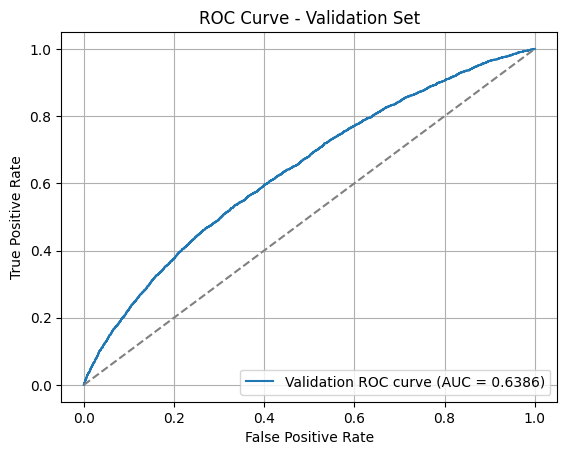

Validation AUC: 0.6386
Validation Recall: 0.5784
Validation Precision: 0.0534

[4] Test Evaluation


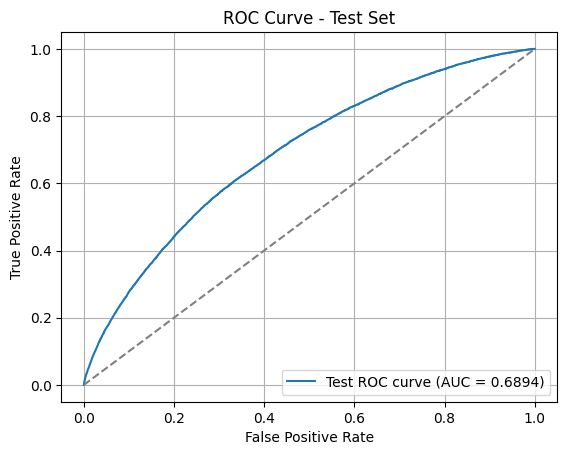

Test AUC: 0.6894
Test Recall: 0.6515
Test Precision: 0.0604


In [ ]:
models, best_params = run_pipeline(
    train_final, test_final,
    target_col='target',
    cat=cat,
    num=num,
    n_trials=10,
    desired_ratio=1.0
)

### Evaluation Metrics & Risk Stratification

In [ ]:
def plot_roc_pr_curves(models, X, y, cat, num, set_name="Set"):
    y_prob = predict_ensemble(models, X, cat, num)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y, y_prob)
    auc_score = roc_auc_score(y, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC (AUC = {auc_score:.4f})")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {set_name}")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Precision-Recall Curve (vs threshold)
    from sklearn.metrics import precision_recall_curve
    precisions, recalls, thresholds = precision_recall_curve(y, y_prob)
    plt.figure()
    plt.plot(thresholds, precisions[:-1], label="Precision")
    plt.plot(thresholds, recalls[:-1], label="Recall")
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.title(f"Precision & Recall vs Threshold - {set_name}")
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"[{set_name}] ROC AUC = {auc_score:.4f}")


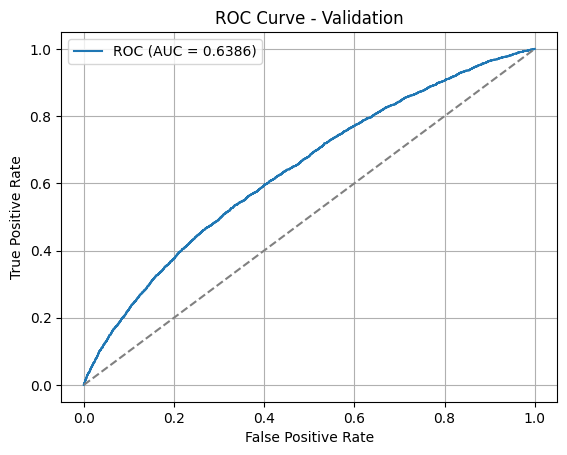

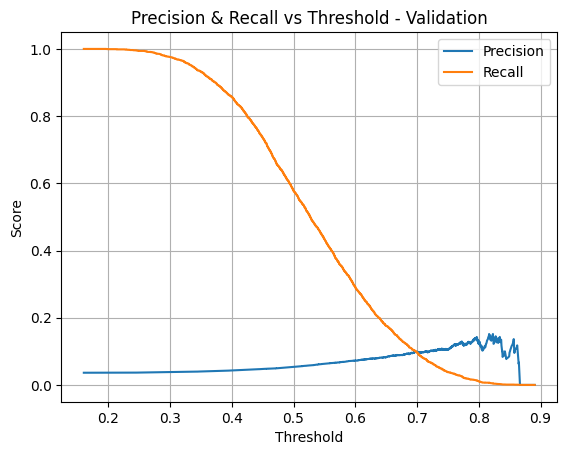

[Validation] ROC AUC = 0.6386


In [ ]:
# validation data
plot_roc_pr_curves(models, X_val, y_val, cat, num, set_name="Validation")

In [ ]:
def evaluate_thresholds(models, X, y, cat, num, thresholds=[0.3, 0.4, 0.5]):
    y_prob = predict_ensemble(models, X, cat, num)
    results = []

    total = len(y_prob)

    for threshold in thresholds:
        y_pred = (y_prob >= threshold).astype(int)
        precision = precision_score(y, y_pred)
        recall = recall_score(y, y_pred)
        f1 = 2 * precision * recall / (precision + recall + 1e-8)

        below_threshold_pct = (y_prob < threshold).mean()

        results.append({
            "threshold": threshold,
            "precision": precision,
            "recall": recall,
            "pct_below_threshold": below_threshold_pct,
            "f1": f1
        })

    result_df = pd.DataFrame(results)
    return result_df


In [ ]:
import numpy as np

thresholds = np.concatenate([np.arange(0.3, 0.6, 0.01), [0.6]])

evaluate_thresholds(models, X_val, y_val, cat, num, thresholds=thresholds)

,threshold,precision,recall,pct_below_threshold,f1
0,0.30,0.037904,0.975844,0.066339,0.072973
1,0.31,0.038255,0.969557,0.080859,0.073605
2,0.32,0.038739,0.964924,0.096688,0.074488
3,0.33,0.039117,0.955989,0.113705,0.075159
4,0.34,0.039498,0.943415,0.133805,0.075822
5,0.35,0.039984,0.932495,0.154230,0.076680
6,0.36,0.040435,0.918266,0.176431,0.077460
7,0.37,0.040984,0.904368,0.199748,0.078414
8,0.38,0.041605,0.889808,0.224397,0.079494
9,0.39,0.042194,0.872270,0.250282,0.080493


choose threshold

- high_thr=0.54

- low_thr=0.37

### Evaluation for test dataset

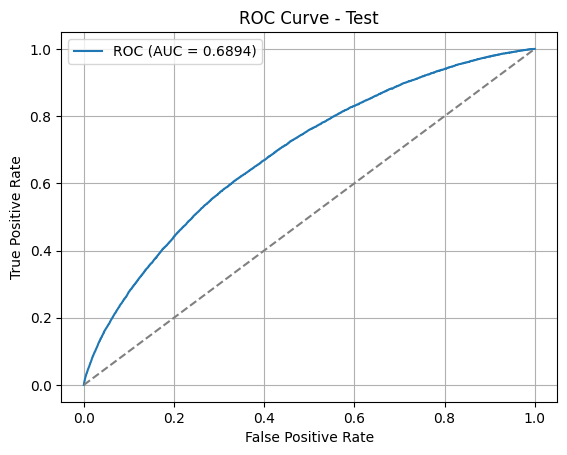

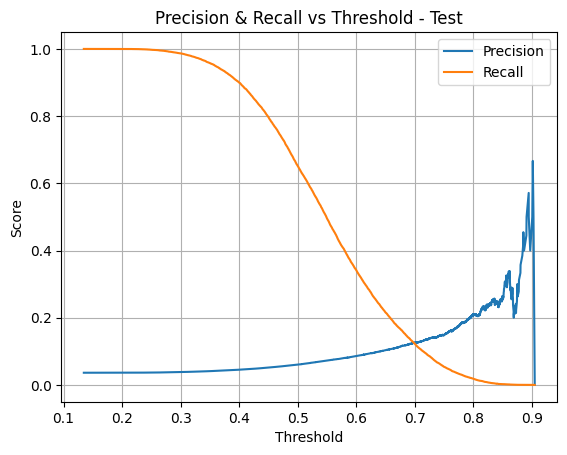

[Test] ROC AUC = 0.6894


In [ ]:
# test data
X_test = test_final.drop(columns=['target'])
y_test = test_final['target']
plot_roc_pr_curves(models, X_test, y_test, cat, num, set_name="Test")


In [ ]:
evaluate_thresholds(models, X_test, y_test, cat, num, thresholds=[0.37, 0.54])

,threshold,precision,recall,pct_below_threshold,f1
0,0.37,0.042504,0.938381,0.199401,0.081325
1,0.54,0.070036,0.529221,0.725980,0.123701


In [ ]:
def save_test_predictions(models, test_df, cat, num, target,
                          low_thr=0.37, high_thr=0.55, output_path='test_predictions.csv'):


    if target in test_df.columns:
        X_test = test_df.drop(columns=[target])
    else:
        X_test = test_df.copy()


    X_enc = pd.concat([
        X_test[num],
        X_test[cat].apply(lambda s: s.astype('category'))
    ], axis=1)

    # probability
    preds = [model[0].predict_proba(X_enc)[:, 1] for model in models]
    pred_prob = np.mean(preds, axis=0)
    risk_group = np.where(prob >= high_thr, "High", np.where(prob >= low_thr, "Medium", "Low"))


    # prediction
    result_df = test_df.copy()
    result_df['pred_prob'] = pred_prob
    result_df['risk_group'] = risk_group

    # save file
    result_df.to_csv(output_path, index=False)

    return result_df


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = save_test_predictions(
    models=models,
    test_df=test_final,
    cat=cat,
    num=num,
    target='target',
    low_thr=0.37,
    high_thr=0.55,
    output_path='/content/drive/MyDrive/submission.csv'
)


### SHAP Feature Importance

In [ ]:
import shap
import pandas as pd
import matplotlib.pyplot as plt

def plot_shap_explanations(models, data, cat, num, model_idx=0, max_display=20):

    model = models[model_idx][0]

    X_shap = pd.concat([
        data[num],
        data[cat].apply(lambda s: s.astype("category"))
    ], axis=1)

    explainer = shap.TreeExplainer(model, feature_perturbation='tree_path_dependent')
    shap_values = explainer(X_shap)


    print("SHAP Feature Importance (Top Features)")
    shap.plots.bar(shap_values, max_display=max_display)
    plt.show()

    print("SHAP Summary (Beeswarm) Plot")
    shap.plots.beeswarm(shap_values, max_display=max_display)
    plt.show()

SHAP Feature Importance (Top Features)


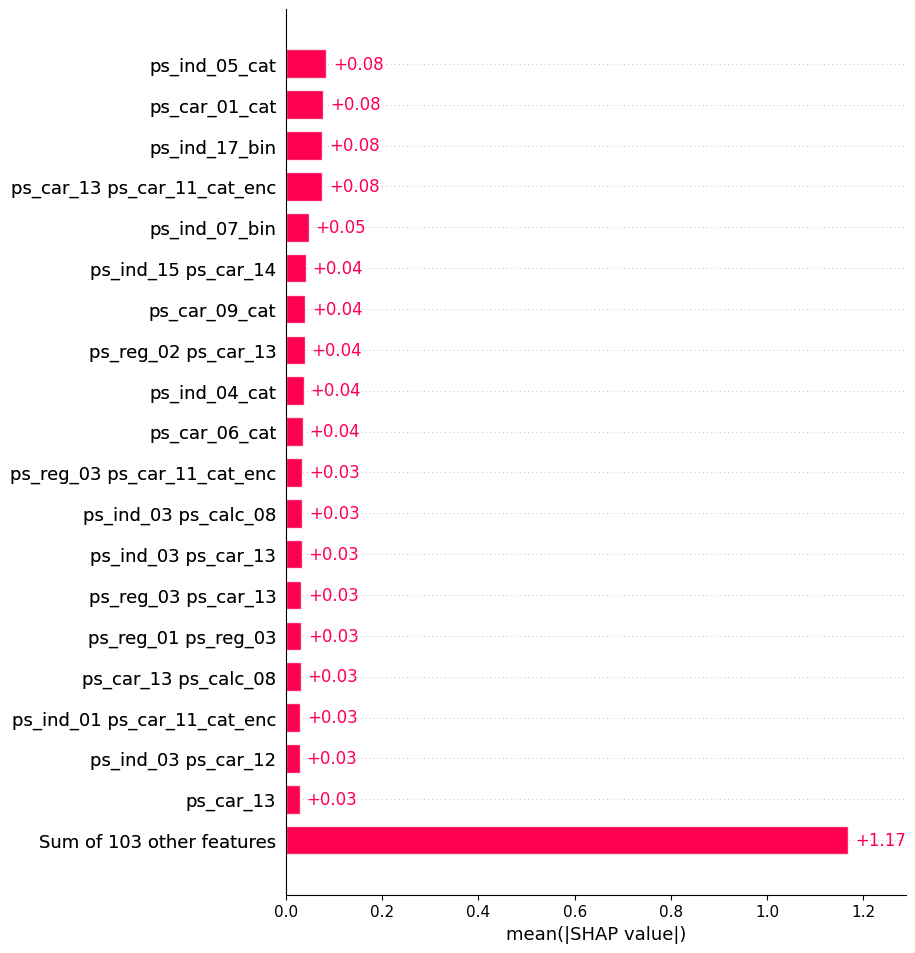

SHAP Summary (Beeswarm) Plot


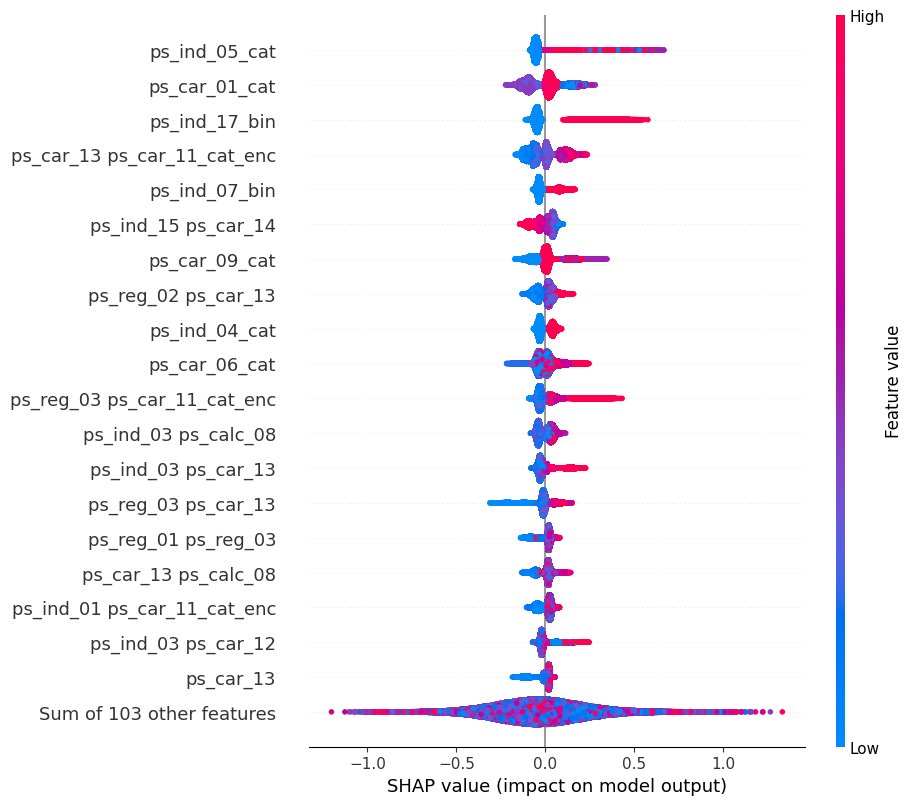

In [ ]:
plot_shap_explanations(models=models, data=train_final, cat=cat, num=num, model_idx=0, max_display=20)